# 1. Importing Libraries & Data

In [2]:
# importimg modules
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# importing customer data
customer_df = pd.read_csv('customer_data.csv')
display(customer_df.shape)
customer_df.head()

(168, 10)

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [4]:
# importing customer data
trx_df = pd.read_csv('transaction_data.csv')
display(trx_df.shape)
trx_df.head()

(623, 11)

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


# 2. Data Overview

In [5]:
# basic info of customer data
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB


In [6]:
# customer data overview & samples (especially on nan & nan percentage)
def describe_(data):
    listItem = []
    for col in data.columns:
        listItem.append([col, data[col].dtype, data[col].notna().sum(), data[col].isna().sum(),
                        round((data[col].isna().sum()/len(data[col])) * 100,2),
                        data[col].nunique(), list(data[col].drop_duplicates().sample(2).values)]);
    dfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Not-Null Count', 'Null Count', 'Null %', 
                                   'N-Unique', 'Unique Sample'],
                         data=listItem)
    return dfDesc
describe_(customer_df)

,Data Features,Data Type,Not-Null Count,Null Count,Null %,N-Unique,Unique Sample
0,Unnamed: 0,int64,168,0,0.0,168,"[63, 143]"
1,customerEmail,object,168,0,0.0,161,"[fharris@hotmail.com, david45@gmail.com]"
2,customerPhone,object,168,0,0.0,168,"[299-883-0904, 952-580-9304x38838]"
3,customerDevice,object,168,0,0.0,168,"[t2ztblzdu5hhzuo5fl6g, yyeiaxpltf82440jnb3v]"
4,customerIPAddress,object,168,0,0.0,165,"[8.13.234.51, a8da:1d73:a062:6289:e6a6:7bcc:51..."
5,customerBillingAddress,object,168,0,0.0,166,"[88469 Rebecca Land\nWest Kyleborough, DC 1571..."
6,No_Transactions,int64,168,0,0.0,13,"[6, 3]"
7,No_Orders,int64,168,0,0.0,9,"[8, 0]"
8,No_Payments,int64,168,0,0.0,11,"[4, 7]"
9,Fraud,bool,168,0,0.0,2,"[True, False]"


In [7]:
# basic info of transaction data
trx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        623 non-null    int64 
 1   customerEmail                     623 non-null    object
 2   transactionId                     623 non-null    object
 3   orderId                           623 non-null    object
 4   paymentMethodId                   623 non-null    object
 5   paymentMethodRegistrationFailure  623 non-null    int64 
 6   paymentMethodType                 623 non-null    object
 7   paymentMethodProvider             623 non-null    object
 8   transactionAmount                 623 non-null    int64 
 9   transactionFailed                 623 non-null    int64 
 10  orderState                        623 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.7+ KB


In [8]:
# transaction data overview & samples (especially on nan & nan percentage)
describe_(trx_df)

,Data Features,Data Type,Not-Null Count,Null Count,Null %,N-Unique,Unique Sample
0,Unnamed: 0,int64,623,0,0.0,623,"[235, 313]"
1,customerEmail,object,623,0,0.0,136,"[ssmith@levine-harmon.biz, gonzalesjackson@gma..."
2,transactionId,object,623,0,0.0,623,"[x84iyy6o, apeqsf6w]"
3,orderId,object,623,0,0.0,478,"[mpwhj2, znrz7h]"
4,paymentMethodId,object,623,0,0.0,237,"[ujky4teqc, rqpuq19z6]"
5,paymentMethodRegistrationFailure,int64,623,0,0.0,2,"[0, 1]"
6,paymentMethodType,object,623,0,0.0,4,"[apple pay, card]"
7,paymentMethodProvider,object,623,0,0.0,10,"[Diners Club / Carte Blanche, JCB 16 digit]"
8,transactionAmount,int64,623,0,0.0,67,"[26, 19]"
9,transactionFailed,int64,623,0,0.0,2,"[1, 0]"


# 3. Data Preparation & Feature Engineering 

## 1st Data Enrichment (Transaction)

In [9]:
# declaring function for group
def percentile(n):
    def percentile_(grp):
        return grp.quantile(n / 100)
    percentile_.__name__ = f'{n}%'
    return percentile_

### first wave of aggregation
trx_info = trx_df.groupby(['customerEmail']).agg({'paymentMethodType':pd.Series.nunique,
                                       'paymentMethodProvider':pd.Series.nunique,
                                       'paymentMethodRegistrationFailure': [sum, 'mean'],
                                       'transactionFailed':[sum, 'mean'],
                                       'transactionAmount':[sum,'mean','median','std', 'max','min',
                                                            percentile(75), percentile(90)]                                      
}) 

# flattening multiindex columns, adding extra feature & resetting index
trx_info.columns = ['_'.join(col) for col in trx_info.columns.values]
trx_info['transactionAmount_range'] = trx_info.transactionAmount_max - trx_info.transactionAmount_min
trx_info=trx_info.reset_index()
trx_info

,customerEmail,paymentMethodType_nunique,paymentMethodProvider_nunique,paymentMethodRegistrationFailure_sum,paymentMethodRegistrationFailure_mean,transactionFailed_sum,transactionFailed_mean,transactionAmount_sum,transactionAmount_mean,transactionAmount_median,transactionAmount_std,transactionAmount_max,transactionAmount_min,transactionAmount_75%,transactionAmount_90%,transactionAmount_range
0,1yf0@jedyz63t,2,3,0,0.0,5,0.500000,217,21.700000,12.0,14.719979,45,11,33.00,45.0,34
1,9es7t@u6n7x,1,1,0,0.0,1,0.500000,32,16.000000,16.0,0.000000,16,16,16.00,16.0,0
2,abigail08@yahoo.com,1,2,1,0.2,2,0.400000,209,41.800000,42.0,7.758866,48,29,48.00,48.0,19
3,alec27@bell.com,1,2,0,0.0,2,0.333333,158,26.333333,30.0,8.041559,34,12,30.00,32.0,22
4,aliciaanthony@martin.com,1,1,0,0.0,0,0.000000,95,31.666667,39.0,18.147543,45,11,42.00,43.8,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,wdelacruz@yahoo.com,1,1,0,0.0,1,0.250000,231,57.750000,56.5,13.225606,72,46,67.50,70.2,26
132,whitedavid@jones-lloyd.org,1,1,3,0.6,0,0.000000,283,56.600000,52.0,14.046352,73,43,70.00,71.8,30
133,ybrown@gmail.com,1,3,0,0.0,1,0.200000,144,28.800000,36.0,17.527122,46,10,42.00,44.4,36
134,ypruitt@hotmail.com,1,1,0,0.0,0,0.000000,146,36.500000,34.0,9.255629,49,29,40.75,45.7,20


## 2nd Data Enrichment (Payment Method & Provider)

In [10]:
# showcase the value counts of payment types & its providers from trx data
display(trx_df.paymentMethodType.value_counts().to_frame('paymentType_count'))
display(trx_df.paymentMethodProvider.value_counts().sort_index().to_frame('paymentProvider_count'))

,paymentType_count
card,479
apple pay,49
paypal,48
bitcoin,47


,paymentProvider_count
American Express,45
Diners Club / Carte Blanche,58
Discover,41
JCB 15 digit,45
JCB 16 digit,118
Maestro,69
Mastercard,32
VISA 13 digit,58
VISA 16 digit,96
Voyager,61


In [11]:
### second wave of aggregation
trx_df['paymentMethodType_variety'] = trx_df.groupby(['customerEmail'])['paymentMethodType']\
                                        .transform(lambda x: ', '.join(x)).transform(lambda x: x.split(', '))

trx_df['paymentMethodProvider_variety'] = trx_df.groupby(['customerEmail'])['paymentMethodProvider']\
                                        .transform(lambda x: ', '.join(x)).transform(lambda x: x.split(', '))

# on paymentMethodType (flag counting)
trx_df['is_card'] = trx_df['paymentMethodType_variety'].apply(lambda x: x.count('card'))
trx_df['is_applepay'] = trx_df['paymentMethodType_variety'].apply(lambda x: x.count('apple pay'))
trx_df['is_paypal'] = trx_df['paymentMethodType_variety'].apply(lambda x: x.count('paypal'))
trx_df['is_bitcoin'] = trx_df['paymentMethodType_variety'].apply(lambda x: x.count('bitcoin'))   

# on paymentMethodProvider (flag counting)
trx_df['is_american_express'] = trx_df['paymentMethodProvider_variety'].apply(lambda x: x.count('American Express')) 
trx_df['is_diners_club'] = trx_df['paymentMethodProvider_variety'].apply(lambda x: x.count('Diners Club / Carte Blanche')) 
trx_df['is_discover'] = trx_df['paymentMethodProvider_variety'].apply(lambda x: x.count('Discover')) 
trx_df['is_jcb15'] = trx_df['paymentMethodProvider_variety'].apply(lambda x: x.count('JCB 15 digit')) 
trx_df['is_jcb16'] = trx_df['paymentMethodProvider_variety'].apply(lambda x: x.count('JCB 16 digit')) 
trx_df['is_maestro'] = trx_df['paymentMethodProvider_variety'].apply(lambda x: x.count('Maestro')) 
trx_df['is_mastercard'] = trx_df['paymentMethodProvider_variety'].apply(lambda x: x.count('Mastercard')) 
trx_df['is_visa13'] = trx_df['paymentMethodProvider_variety'].apply(lambda x: x.count('VISA 13 digit')) 
trx_df['is_visa16'] = trx_df['paymentMethodProvider_variety'].apply(lambda x: x.count('VISA 16 digit')) 
trx_df['is_voyager'] = trx_df['paymentMethodProvider_variety'].apply(lambda x: x.count('Voyager')) 

# data contingency with dropped duplicates by email 
trx_info2 = trx_df.copy().drop_duplicates(subset=['customerEmail']).set_index('customerEmail')
trx_info2 = trx_info2.loc[:,'is_card':].reset_index()
trx_info2

,customerEmail,is_card,is_applepay,is_paypal,is_bitcoin,is_american_express,is_diners_club,is_discover,is_jcb15,is_jcb16,is_maestro,is_mastercard,is_visa13,is_visa16,is_voyager
0,josephhoward@yahoo.com,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1,evansjeffery@yahoo.com,0,0,0,3,2,0,0,0,0,0,0,0,1,0
2,andersonwilliam@yahoo.com,5,0,0,0,0,0,1,0,4,0,0,0,0,0
3,rubenjuarez@yahoo.com,3,0,0,0,0,0,0,0,0,0,0,0,0,3
4,uchen@malone.com,4,3,0,0,1,0,0,0,3,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,patrickcalderon@russo.net,0,3,0,0,3,0,0,0,0,0,0,0,0,0
132,mitchellvickie@brewer-jones.com,3,0,0,0,0,0,0,0,3,0,0,0,0,0
133,sbrown@hughes.biz,6,0,0,0,0,0,1,0,0,0,0,0,0,5
134,ethompson@jackson-sanders.com,6,0,0,2,2,0,0,0,2,1,0,0,0,3


In [33]:
# joining trx data with customer data
pd.set_option('display.max_columns', None)
df = customer_df.merge(trx_info, on='customerEmail', how='left')
df = df.merge(trx_info2, on='customerEmail', how='left')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,paymentMethodType_nunique,paymentMethodProvider_nunique,paymentMethodRegistrationFailure_sum,paymentMethodRegistrationFailure_mean,transactionFailed_sum,transactionFailed_mean,transactionAmount_sum,transactionAmount_mean,transactionAmount_median,transactionAmount_std,transactionAmount_max,transactionAmount_min,transactionAmount_75%,transactionAmount_90%,transactionAmount_range,is_card,is_applepay,is_paypal,is_bitcoin,is_american_express,is_diners_club,is_discover,is_jcb15,is_jcb16,is_maestro,is_mastercard,is_visa13,is_visa16,is_voyager
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,1.0,1.0,2.0,1.000000,0.0,0.000000,44.0,22.000000,22.0,5.656854,26.0,18.0,24.0,25.2,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,1.0,2.0,1.0,0.333333,1.0,0.333333,111.0,37.000000,43.0,12.165525,45.0,23.0,44.0,44.6,22.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,1.0,2.0,0.0,0.000000,2.0,0.400000,131.0,26.200000,25.0,3.834058,33.0,24.0,25.0,29.8,9.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,1.0,1.0,0.0,0.000000,0.0,0.000000,85.0,28.333333,26.0,4.932883,34.0,25.0,30.0,32.4,9.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,2.0,4.0,0.0,0.000000,2.0,0.285714,411.0,58.714286,66.0,14.556949,71.0,32.0,68.5,69.8,39.0,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,0.0


In [13]:
df.shape

(168, 38)

## 3rd Data Enrichment (Customer Data, Email & Country)

In [14]:
# showcase1
df.customerEmail[0].split('@')[1]

'yahoo.com'

In [15]:
# showcase2
df.customerEmail[0].split('@')[0]

'josephhoward'

In [34]:
# deriving more information from customer data
df['customerPhoneLen'] = df.customerPhone.apply(lambda x: len(x))
df['IPAddressLen'] = df.customerIPAddress.apply(lambda x: len(x))
df['BillingAddressLen'] = df.customerBillingAddress.apply(lambda x: len(x))
df['emailNameLen'] = df.customerEmail.apply(lambda x: len(x.split('@')[0]))
df['emailType'] = df.customerEmail.apply(lambda x: x.split('@')[1])
df['emailTypeDomain'] = df.emailType.apply(lambda x: x.split('.')[1] if '.' in x else 'other')

In [35]:
# showcasing the valuecounts of emailtypes & its end domain
display(df['emailType'].value_counts().to_frame())
display(df['emailTypeDomain'].value_counts().to_frame())

,emailType
gmail.com,31
yahoo.com,29
hotmail.com,23
wright.com,3
jones.com,2
randolph.com,1
ramirez-shaffer.com,1
atkinson.com,1
rogers.com,1
wallace-johnson.com,1


,emailTypeDomain
com,131
biz,11
org,9
net,7
info,6
other,4


In [36]:
# calling ip country data
ipcountry= pd.read_csv("ipcountry.txt")[['IP','Country']].rename(columns={'IP': 'customerIPAddress'})
ipcountry

,customerIPAddress,Country
0,8.129.104.40,China
1,219.173.211.202,Japan
2,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,Switzerland
3,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,Switzerland
4,196.89.235.192,Morocco
5,43.166.163.164,China
6,33.67.35.30,United States
7,212.144.68.190,Germany
8,c899:ff67:6864:4365:def3:3023:655f:5181,Switzerland
9,86.16.65.228,United Kingdom


In [37]:
# merging data & showing value counts
df = df.merge(ipcountry, how='inner', on='customerIPAddress')
df = df.drop_duplicates(subset=['customerEmail','customerIPAddress'])
df.reset_index(drop=True, inplace=True)
display(df.shape)
display(df['Country'].value_counts().to_frame())

(168, 45)

,Country
Switzerland,58
United States,33
Unknown,13
reserved range,12
China,10
France,7
Japan,4
Hong Kong,4
United Kingdom,3
Italy,3


In [38]:
# getting the top5 countries only (the rest set as 'other')
country_top10 = df['Country'].value_counts().head(10).index.tolist()
df.loc[[x not in country_top10 for x in df['Country']], 'Country'] = 'other'

# getting the top5 email types only (the rest set as 'other')
email_top5 = df['emailType'].value_counts().head(5).index.tolist()
df.loc[[x not in email_top5 for x in df['emailType']], 'emailType'] = 'other'

In [39]:
# end result
display(df['emailType'].value_counts())
display(df['Country'].value_counts())

other          80
gmail.com      31
yahoo.com      29
hotmail.com    23
wright.com      3
jones.com       2
Name: emailType, dtype: int64

Switzerland       58
United States     33
other             21
Unknown           13
reserved range    12
China             10
France             7
Japan              4
Hong Kong          4
United Kingdom     3
Italy              3
Name: Country, dtype: int64

In [40]:
# final ready data
df.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,paymentMethodType_nunique,paymentMethodProvider_nunique,paymentMethodRegistrationFailure_sum,paymentMethodRegistrationFailure_mean,transactionFailed_sum,transactionFailed_mean,transactionAmount_sum,transactionAmount_mean,transactionAmount_median,transactionAmount_std,transactionAmount_max,transactionAmount_min,transactionAmount_75%,transactionAmount_90%,transactionAmount_range,is_card,is_applepay,is_paypal,is_bitcoin,is_american_express,is_diners_club,is_discover,is_jcb15,is_jcb16,is_maestro,is_mastercard,is_visa13,is_visa16,is_voyager,customerPhoneLen,IPAddressLen,BillingAddressLen,emailNameLen,emailType,emailTypeDomain,Country
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,1.0,1.0,2.0,1.000000,0.0,0.000000,44.0,22.000000,22.0,5.656854,26.0,18.0,24.0,25.2,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,12,12,38,12,yahoo.com,com,China
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,1.0,2.0,1.0,0.333333,1.0,0.333333,111.0,37.000000,43.0,12.165525,45.0,23.0,44.0,44.6,22.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,15,55,12,yahoo.com,com,Japan
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,1.0,2.0,0.0,0.000000,2.0,0.400000,131.0,26.200000,25.0,3.834058,33.0,24.0,25.0,29.8,9.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,12,39,45,15,yahoo.com,com,Switzerland
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,1.0,1.0,0.0,0.000000,0.0,0.000000,85.0,28.333333,26.0,4.932883,34.0,25.0,30.0,32.4,9.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,18,39,51,11,yahoo.com,com,Switzerland
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,2.0,4.0,0.0,0.000000,2.0,0.285714,411.0,58.714286,66.0,14.556949,71.0,32.0,68.5,69.8,39.0,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,0.0,14,14,59,5,other,com,other


In [41]:
# final overview descripiton
display(df.shape)
describe_(df)

(168, 45)

,Data Features,Data Type,Not-Null Count,Null Count,Null %,N-Unique,Unique Sample
0,customerEmail,object,168,0,0.00,161,"[brittany60@yahoo.com, mitchellgriffith@yahoo...."
1,customerPhone,object,168,0,0.00,168,"[299-883-0904, 698-954-1805]"
2,customerDevice,object,168,0,0.00,168,"[n29he2b6a841zcbiw2i9, ewc3gyloi1ing9o64jpt]"
3,customerIPAddress,object,168,0,0.00,165,"[85.188.105.126, d7d:faf5:36a8:6b28:f7bc:b265:..."
4,customerBillingAddress,object,168,0,0.00,166,"[412 Joshua Knoll Apt. 533\nDavidland, ME 6149..."
5,No_Transactions,int64,168,0,0.00,13,"[6, 15]"
6,No_Orders,int64,168,0,0.00,9,"[2, 4]"
7,No_Payments,int64,168,0,0.00,11,"[15, 7]"
8,Fraud,bool,168,0,0.00,2,"[False, True]"
9,paymentMethodType_nunique,float64,143,25,14.88,3,"[2.0, nan]"


# 4. Null Checking

In [42]:
# null check 1
trx_df[trx_df.customerEmail=="ubranch@rivera-parker.info"]

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,paymentMethodType_variety,paymentMethodProvider_variety,is_card,is_applepay,is_paypal,is_bitcoin,is_american_express,is_diners_club,is_discover,is_jcb15,is_jcb16,is_maestro,is_mastercard,is_visa13,is_visa16,is_voyager


In [43]:
# fraud when null
df[df.is_voyager.isna()]['Fraud'].value_counts(normalize=True)

False    0.8
True     0.2
Name: Fraud, dtype: float64

In [44]:
# fraud when not null
df[df.is_voyager.notna()]['Fraud'].value_counts(normalize=True)

False    0.608392
True     0.391608
Name: Fraud, dtype: float64

In [45]:
# trying to find the null combinations
pd.options.display.max_rows = None

null = []
for idx in range(len(df)):
    temp = []
    for i in df.columns:
        if df[i].isna()[idx]==True:
            temp.append(i)
        else:
            pass
    temp = tuple(temp)
    null.append(temp)
        
print('total_null:', len(null))
pd.Series(null).value_counts().to_frame('null_combination_count')

total_null: 168


,null_combination_count
(),125
"(paymentMethodType_nunique, paymentMethodProvider_nunique, paymentMethodRegistrationFailure_sum, paymentMethodRegistrationFailure_mean, transactionFailed_sum, transactionFailed_mean, transactionAmount_sum, transactionAmount_mean, transactionAmount_median, transactionAmount_std, transactionAmount_max, transactionAmount_min, transactionAmount_75%, transactionAmount_90%, transactionAmount_range, is_card, is_applepay, is_paypal, is_bitcoin, is_american_express, is_diners_club, is_discover, is_jcb15, is_jcb16, is_maestro, is_mastercard, is_visa13, is_visa16, is_voyager)",25
"(transactionAmount_std,)",18


# 5. Mahalanobis Outlier Analysis

In [46]:
# defining data for outlier test
from scipy.stats import chi2
mydata_test = df.select_dtypes(exclude='object').drop('Fraud',axis=1)
mydata_test = mydata_test.to_numpy()

# covariance matrix
covariance  = np.cov(mydata_test, rowvar=False)
covariance_pm1 = np.linalg.matrix_power(covariance, -1)
# center point
centerpoint = np.mean(mydata_test , axis=0)

# distances from center point 
distances = []
for i, val in enumerate(mydata_test):
    p1 = val
    p2 = centerpoint
    distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
    distances.append(distance)
distances = np.array(distances)

# cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
cutoff = chi2.ppf(0.95, mydata_test.shape[1])

# index of outliers
outlierIndexes = np.where(distances > cutoff)
outlierIndexes = list(pd.Series(outlierIndexes)[0])

In [47]:
# the number of multivariate outliers (it seems that there''s no multivariate outlier)
len(outlierIndexes)

0

# 6. Exploratory Data Analysis & Feature Selection

In [48]:
# Basic description for numerical features
pd.options.display.max_rows = None
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No_Transactions,168.0,3.708333,2.801527,0.00,1.000000,4.000000,5.000000,15.000000
No_Orders,168.0,2.845238,1.981919,0.00,1.000000,3.000000,4.000000,8.000000
No_Payments,168.0,2.035714,2.113240,0.00,1.000000,1.000000,2.000000,15.000000
paymentMethodType_nunique,143.0,1.342657,0.594634,1.00,1.000000,1.000000,2.000000,3.000000
paymentMethodProvider_nunique,143.0,1.783217,1.126754,1.00,1.000000,1.000000,2.000000,5.000000
paymentMethodRegistrationFailure_sum,143.0,0.573427,1.646548,0.00,0.000000,0.000000,0.000000,13.000000
paymentMethodRegistrationFailure_mean,143.0,0.121853,0.295245,0.00,0.000000,0.000000,0.000000,1.000000
transactionFailed_sum,143.0,1.468531,1.860653,0.00,0.000000,1.000000,2.000000,12.000000
transactionFailed_mean,143.0,0.226180,0.226517,0.00,0.000000,0.200000,0.333333,1.000000
transactionAmount_sum,143.0,201.300699,234.751263,16.00,76.000000,133.000000,208.000000,1033.000000


In [49]:
# Basic description for numerical features grouped by Fraud
pd.options.display.max_rows = None
df.groupby('Fraud').describe().T

Fraud                                             False         True
No_Transactions                       count  107.000000    61.000000
                                      mean     3.420561     4.213115
                                      std      2.613598     3.061126
                                      min      0.000000     0.000000
                                      25%      1.000000     2.000000
                                      50%      4.000000     4.000000
                                      75%      5.000000     6.000000
                                      max     15.000000    13.000000
No_Orders                             count  107.000000    61.000000
                                      mean     2.495327     3.459016
                                      std      1.706667     2.277233
                                      min      0.000000     0.000000
                                      25%      1.000000     1.000000
                                      50%      3.000000     4.000000
                                      75%      4.000000     5.000000
                                      max      5.000000     8.000000
No_Payments                           count  107.000000    61.000000
                                      mean     1.467290     3.032787
                                      std      0.934837     3.049411
                                      min      0.000000     0.000000
                                      25%      1.000000     1.000000
                                      50%      1.000000     2.000000
                                      75%      2.000000     4.000000
                                      max      4.000000    15.000000
paymentMethodType_nunique             count   87.000000    56.000000
                                      mean     1.218391     1.535714
                                      std      0.415549     0.761918
                                      min      1.000000     1.000000
                                      25%      1.000000     1.000000
                                      50%      1.000000     1.000000
                                      75%      1.000000     2.000000
                                      max      2.000000     3.000000
paymentMethodProvider_nunique         count   87.000000    56.000000
                                      mean     1.448276     2.303571
                                      std      0.660490     1.463739
                                      min      1.000000     1.000000
                                      25%      1.000000     1.000000
                                      50%      1.000000     2.000000
                                      75%      2.000000     3.000000
                                      max      4.000000     5.000000
paymentMethodRegistrationFailure_sum  count   87.000000    56.000000
                                      mean     0.517241     0.660714
                                      std      1.328245     2.056270
                                      min      0.000000     0.000000
                                      25%      0.000000     0.000000
                                      50%      0.000000     0.000000
                                      75%      0.000000     0.000000
                                      max      6.000000    13.000000
paymentMethodRegistrationFailure_mean count   87.000000    56.000000
                                      mean     0.134770     0.101786
                                      std      0.321433     0.250657
                                      min      0.000000     0.000000
                                      25%      0.000000     0.000000
                                      50%      0.000000     0.000000
                                      75%      0.000000     0.000000
                                      max      1.000000     1.000000
transactionFailed_sum                 count   87.000000    56.00000


########## COLUMN: No_Transactions ##########


,Fraud
No_Transactions,
"(-0.001, 1.0]",0.311111
"(1.0, 3.0]",0.382353
"(3.0, 5.0]",0.291667
"(5.0, 6.0]",0.368421
"(6.0, 15.0]",0.590909


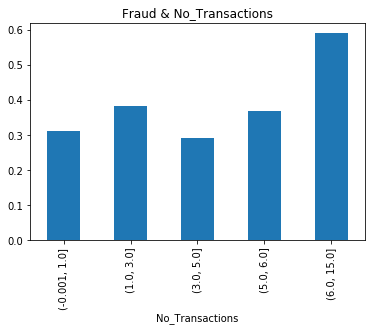

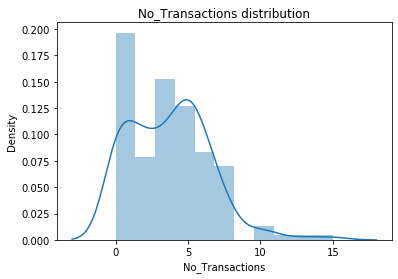


########## COLUMN: No_Orders ##########


,Fraud
No_Orders,
"(-0.001, 1.0]",0.307692
"(1.0, 2.0]",0.263158
"(2.0, 4.0]",0.301587
"(4.0, 4.6]",NaN
"(4.6, 8.0]",0.617647


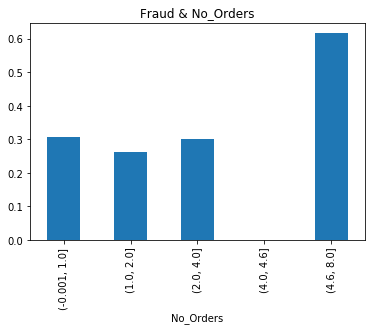

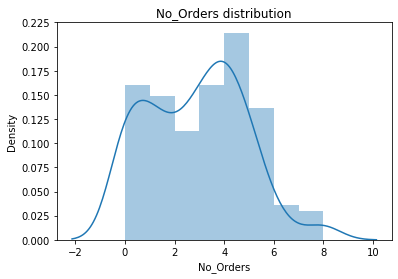


########## COLUMN: No_Payments ##########


,Fraud
No_Payments,
"(-0.001, 1.0]",0.269663
"(1.0, 2.0]",0.333333
"(2.0, 3.0]",0.315789
"(3.0, 15.0]",0.857143


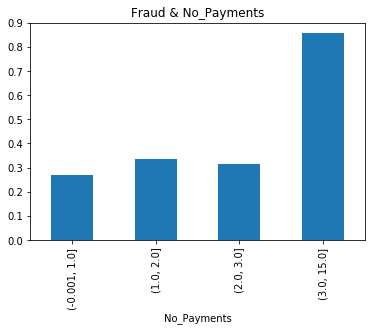

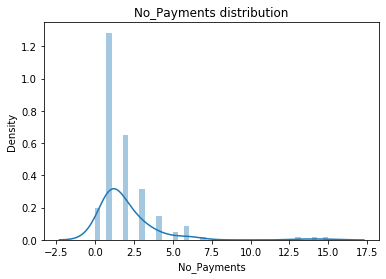


########## COLUMN: paymentMethodType_nunique ##########


,Fraud
paymentMethodType_nunique,
"(0.999, 2.0]",0.350746
"(2.0, 3.0]",1.000000


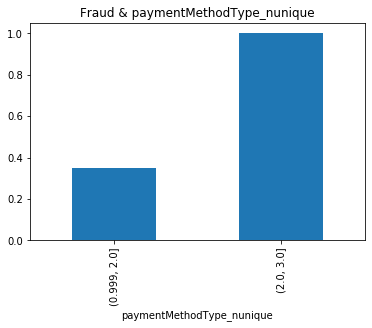

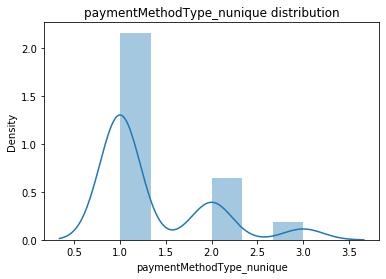


########## COLUMN: paymentMethodProvider_nunique ##########


,Fraud
paymentMethodProvider_nunique,
"(0.999, 2.0]",0.313559
"(2.0, 5.0]",0.760000


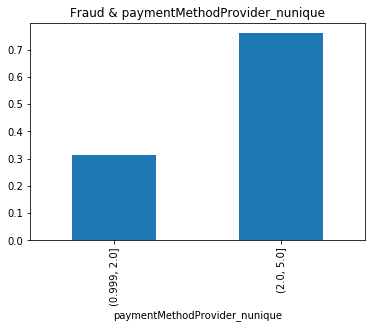

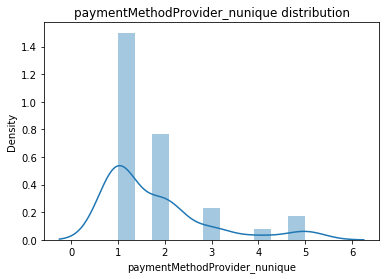


########## COLUMN: paymentMethodRegistrationFailure_sum ##########


,Fraud
paymentMethodRegistrationFailure_sum,
"(-0.013, 2.6]",0.384615
"(2.6, 5.2]",0.400000
"(5.2, 7.8]",0.500000
"(7.8, 10.4]",NaN
"(10.4, 13.0]",1.000000


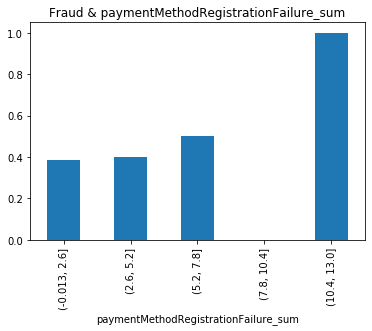

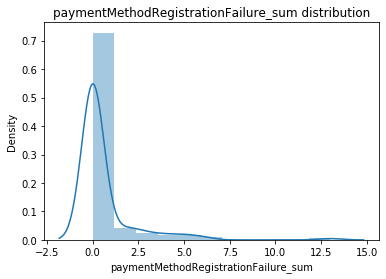


########## COLUMN: paymentMethodRegistrationFailure_mean ##########


,Fraud
paymentMethodRegistrationFailure_mean,
"(-0.001, 0.2]",0.391667
"(0.2, 0.4]",0.333333
"(0.4, 0.6]",0.833333
"(0.6, 0.8]",0.333333
"(0.8, 1.0]",0.181818


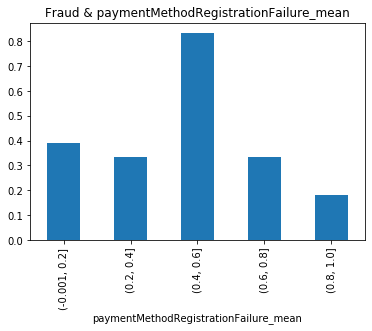

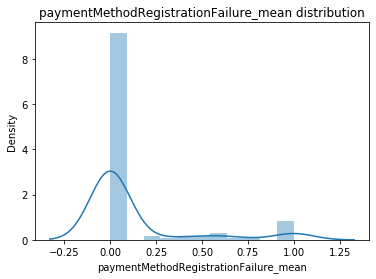


########## COLUMN: transactionFailed_sum ##########


,Fraud
transactionFailed_sum,
"(-0.001, 1.0]",0.380435
"(1.0, 2.0]",0.269231
"(2.0, 12.0]",0.560000


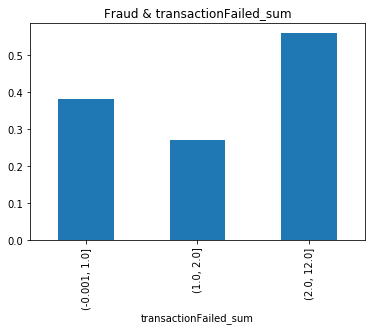

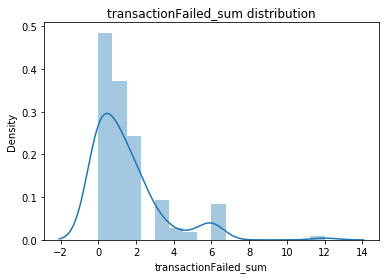


########## COLUMN: transactionFailed_mean ##########


,Fraud
transactionFailed_mean,
"(-0.001, 0.167]",0.393443
"(0.167, 0.25]",0.535714
"(0.25, 0.4]",0.310345
"(0.4, 1.0]",0.320000


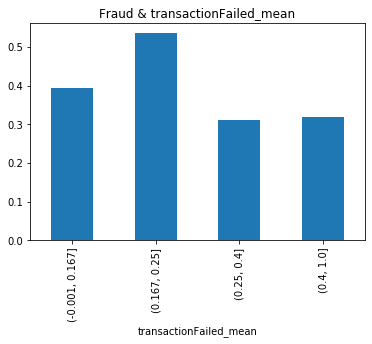

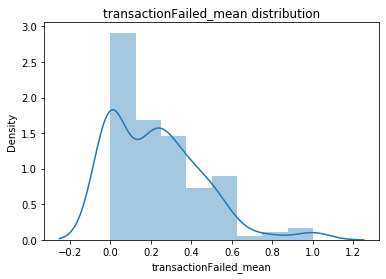


########## COLUMN: transactionAmount_sum ##########


,Fraud
transactionAmount_sum,
"(15.999, 57.4]",0.275862
"(57.4, 110.0]",0.310345
"(110.0, 161.4]",0.285714
"(161.4, 231.0]",0.310345
"(231.0, 1033.0]",0.785714


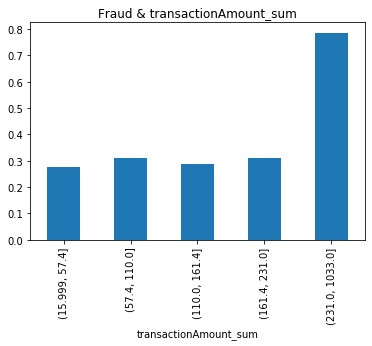

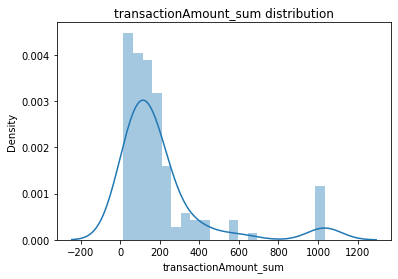


########## COLUMN: transactionAmount_mean ##########


,Fraud
transactionAmount_mean,
"(12.499, 22.9]",0.241379
"(22.9, 28.707]",0.250000
"(28.707, 34.086]",0.275862
"(34.086, 39.84]",0.392857
"(39.84, 353.0]",0.793103


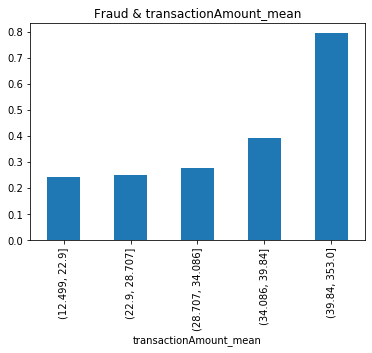

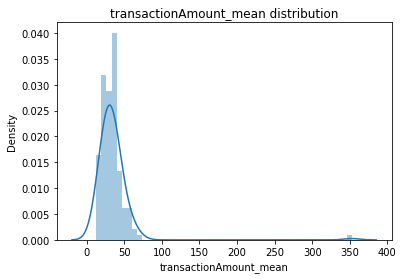


########## COLUMN: transactionAmount_median ##########


,Fraud
transactionAmount_median,
"(10.999, 20.2]",0.241379
"(20.2, 29.4]",0.285714
"(29.4, 34.5]",0.419355
"(34.5, 41.6]",0.269231
"(41.6, 353.0]",0.724138


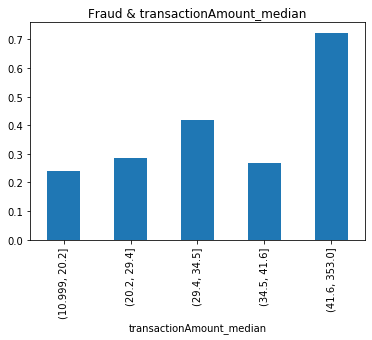

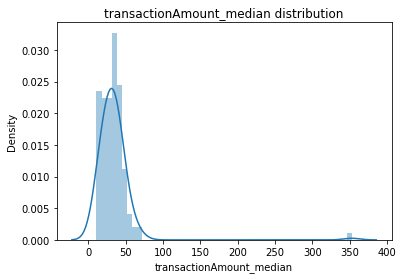


########## COLUMN: transactionAmount_std ##########


,Fraud
transactionAmount_std,
"(-0.001, 5.443]",0.28
"(5.443, 9.538]",0.28
"(9.538, 12.171]",0.40
"(12.171, 15.298]",0.40
"(15.298, 19.092]",0.60


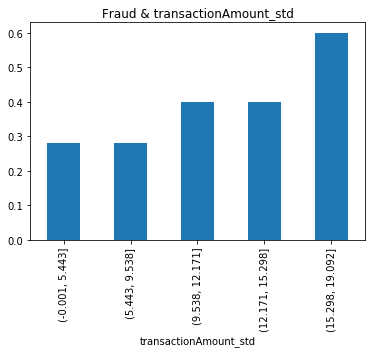

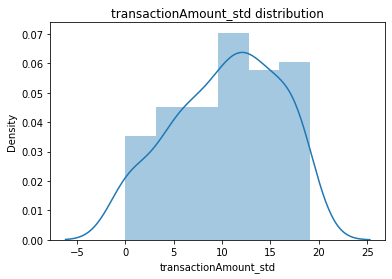


########## COLUMN: transactionAmount_max ##########


,Fraud
transactionAmount_max,
"(13.999, 32.4]",0.241379
"(32.4, 40.8]",0.178571
"(40.8, 46.0]",0.354839
"(46.0, 50.0]",0.241379
"(50.0, 353.0]",1.000000


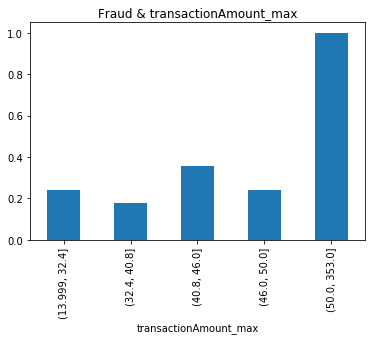

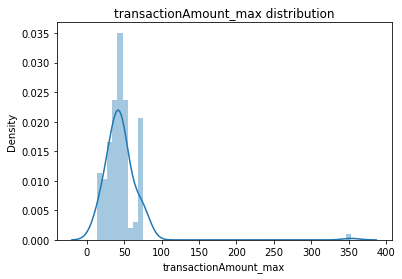


########## COLUMN: transactionAmount_min ##########


,Fraud
transactionAmount_min,
"(9.999, 11.4]",0.482759
"(11.4, 15.0]",0.233333
"(15.0, 20.2]",0.185185
"(20.2, 32.0]",0.413793
"(32.0, 353.0]",0.642857


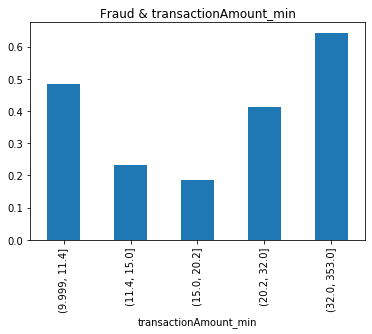

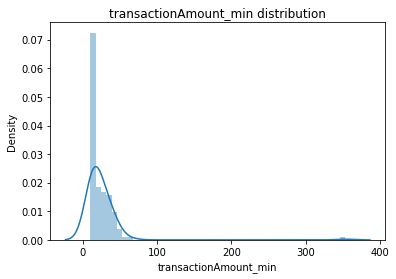


########## COLUMN: transactionAmount_75% ##########


,Fraud
transactionAmount_75%,
"(13.249, 24.4]",0.172414
"(24.4, 34.0]",0.275862
"(34.0, 41.1]",0.357143
"(41.1, 46.55]",0.500000
"(46.55, 353.0]",0.655172


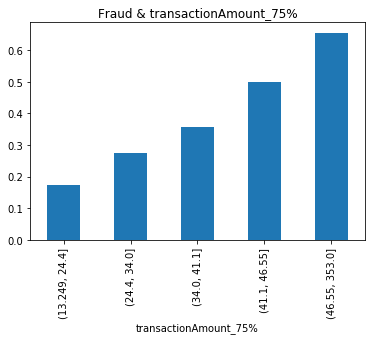

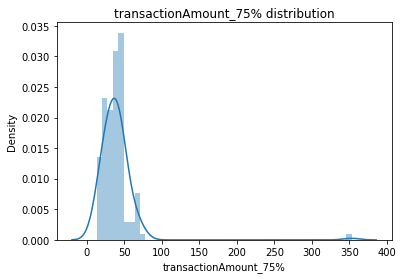


########## COLUMN: transactionAmount_90% ##########


,Fraud
transactionAmount_90%,
"(13.699, 29.88]",0.206897
"(29.88, 38.4]",0.206897
"(38.4, 44.0]",0.275862
"(44.0, 48.56]",0.370370
"(48.56, 353.0]",0.896552


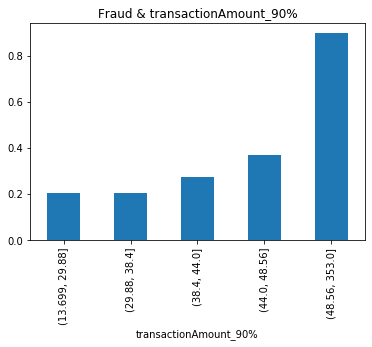

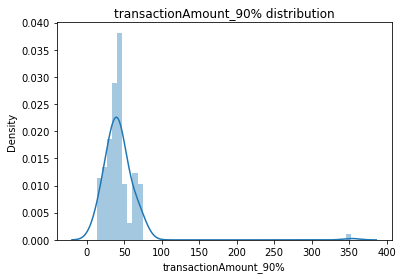


########## COLUMN: transactionAmount_range ##########


,Fraud
transactionAmount_range,
"(-0.001, 3.4]",0.379310
"(3.4, 17.8]",0.250000
"(17.8, 28.0]",0.272727
"(28.0, 35.0]",0.440000
"(35.0, 63.0]",0.642857


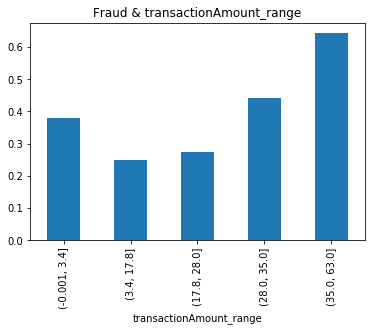

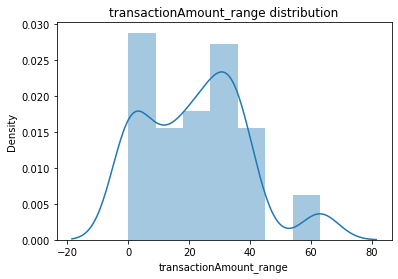


########## COLUMN: is_card ##########


,Fraud
is_card,
"(-0.001, 1.0]",0.341463
"(1.0, 3.0]",0.363636
"(3.0, 4.0]",0.312500
"(4.0, 6.0]",0.290323
"(6.0, 24.0]",0.727273


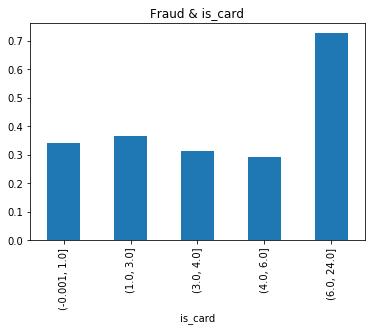

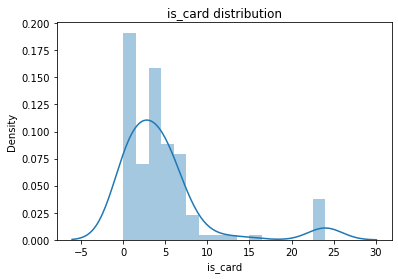


########## COLUMN: is_applepay ##########


,Fraud
is_applepay,
"(-0.007, 1.4]",0.396947
"(1.4, 2.8]",0.200000
"(2.8, 4.2]",0.400000
"(4.2, 5.6]",NaN
"(5.6, 7.0]",0.500000


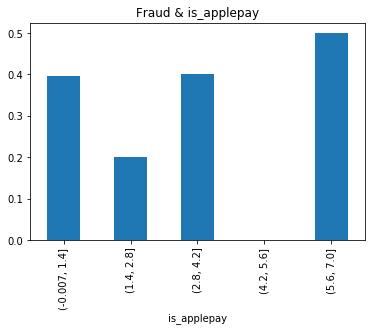

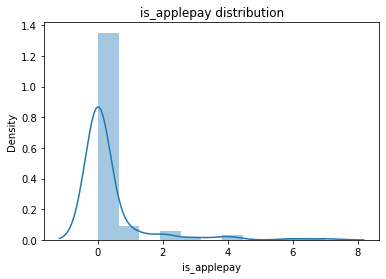


########## COLUMN: is_paypal ##########


,Fraud
is_paypal,
"(-0.005, 1.0]",0.415385
"(1.0, 2.0]",0.250000
"(2.0, 3.0]",0.166667
"(3.0, 4.0]",0.000000
"(4.0, 5.0]",0.000000


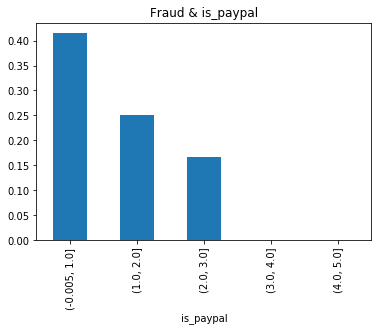

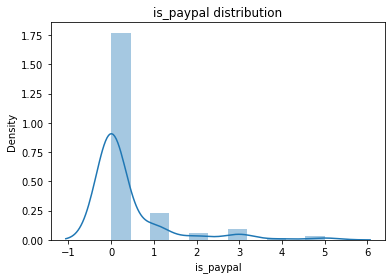


########## COLUMN: is_bitcoin ##########


,Fraud
is_bitcoin,
"(-0.006, 1.2]",0.338710
"(1.2, 2.4]",0.750000
"(2.4, 3.6]",0.818182
"(3.6, 4.8]",0.500000
"(4.8, 6.0]",0.500000


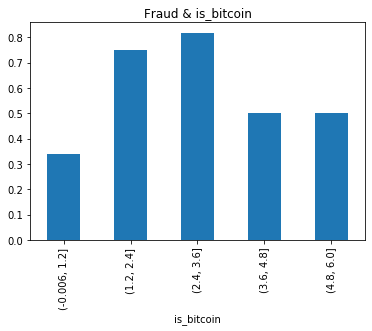

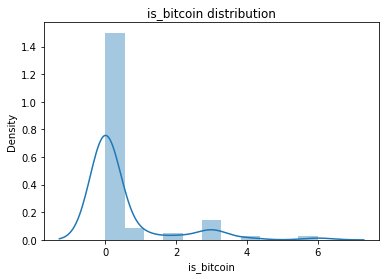


########## COLUMN: is_american_express ##########


,Fraud
is_american_express,
"(-0.007, 1.4]",0.349593
"(1.4, 2.8]",0.666667
"(2.8, 4.2]",0.692308
"(4.2, 5.6]",NaN
"(5.6, 7.0]",0.000000


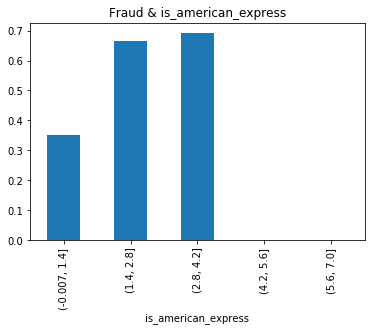

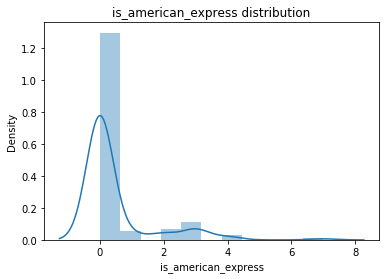


########## COLUMN: is_diners_club ##########


,Fraud
is_diners_club,
"(-0.015, 3.0]",0.392857
"(3.0, 6.0]",0.500000
"(6.0, 9.0]",NaN
"(9.0, 12.0]",NaN
"(12.0, 15.0]",0.000000


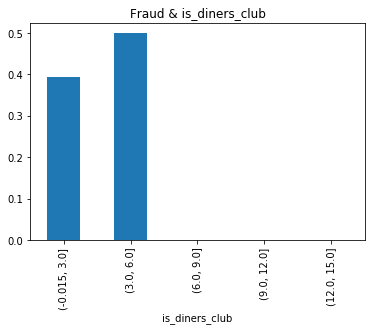

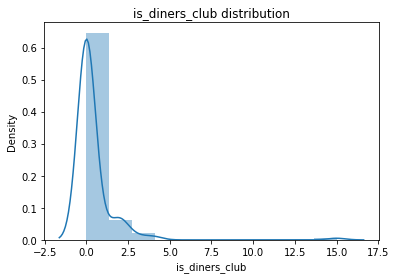


########## COLUMN: is_discover ##########


,Fraud
is_discover,
"(-0.006, 1.2]",0.388060
"(1.2, 2.4]",0.333333
"(2.4, 3.6]",0.500000
"(3.6, 4.8]",NaN
"(4.8, 6.0]",0.500000


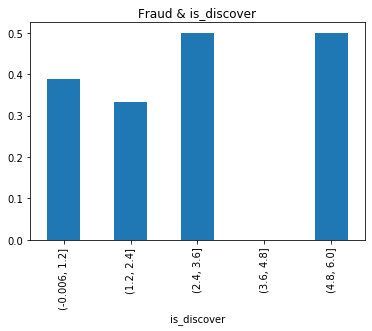

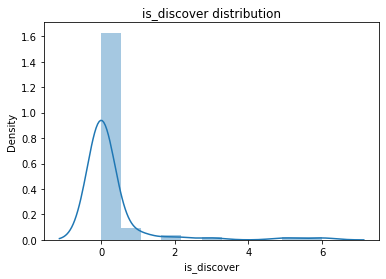


########## COLUMN: is_jcb15 ##########


,Fraud
is_jcb15,
"(-0.011, 2.2]",0.4
"(2.2, 4.4]",0.2
"(4.4, 6.6]",0.0
"(6.6, 8.8]",0.0
"(8.8, 11.0]",1.0


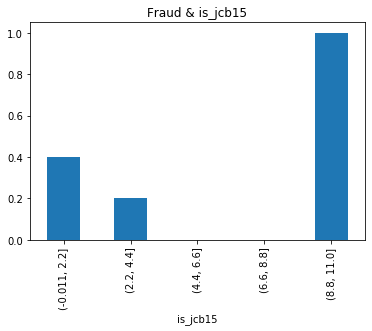

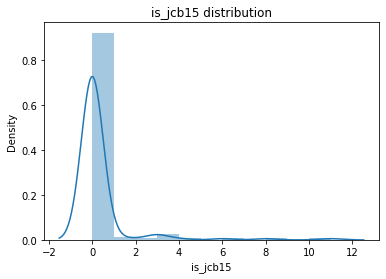


########## COLUMN: is_jcb16 ##########


,Fraud
is_jcb16,
"(-0.001, 3.0]",0.349593
"(3.0, 10.0]",0.650000


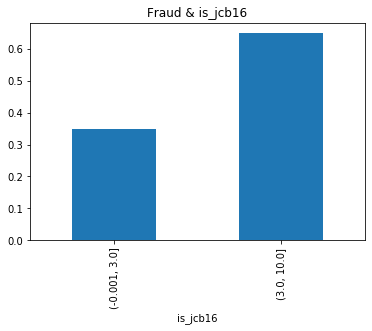

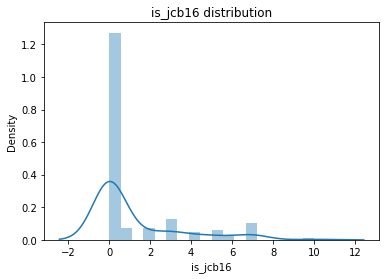


########## COLUMN: is_maestro ##########


,Fraud
is_maestro,
"(-0.001, 1.0]",0.378151
"(1.0, 6.0]",0.458333


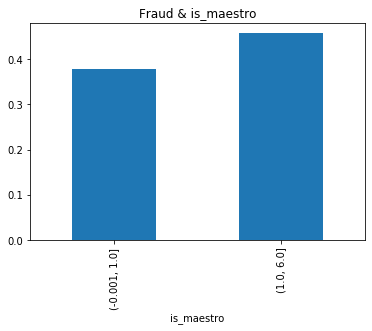

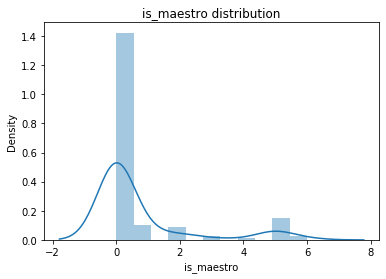


########## COLUMN: is_mastercard ##########


,Fraud
is_mastercard,
"(-0.006, 1.2]",0.388060
"(1.2, 2.4]",0.666667
"(2.4, 3.6]",0.333333
"(3.6, 4.8]",0.500000
"(4.8, 6.0]",0.000000


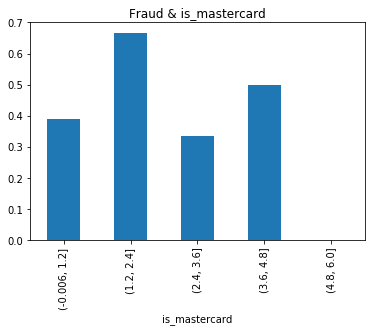

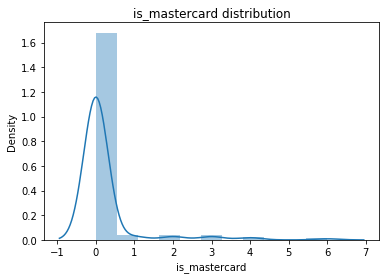


########## COLUMN: is_visa13 ##########


,Fraud
is_visa13,
"(-0.013, 2.6]",0.392593
"(2.6, 5.2]",0.166667
"(5.2, 7.8]",1.000000
"(7.8, 10.4]",NaN
"(10.4, 13.0]",1.000000


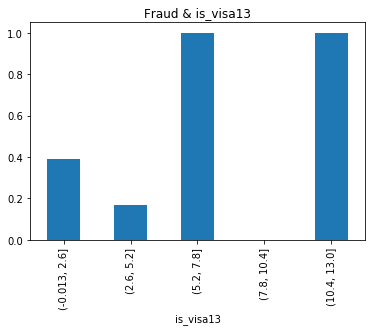

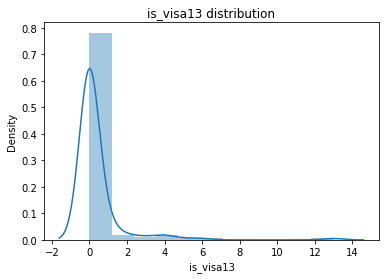


########## COLUMN: is_visa16 ##########


,Fraud
is_visa16,
"(-0.001, 2.0]",0.366667
"(2.0, 10.0]",0.521739


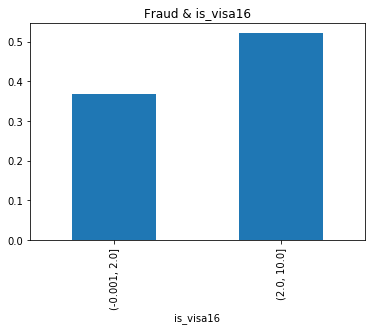

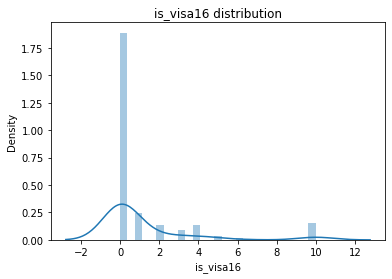


########## COLUMN: is_voyager ##########


,Fraud
is_voyager,
"(-0.001, 1.0]",0.350000
"(1.0, 6.0]",0.608696


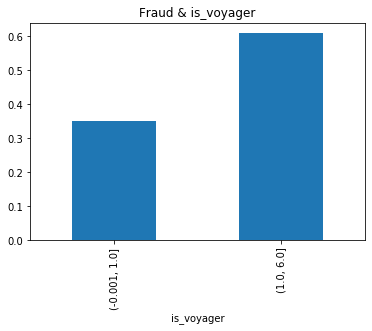

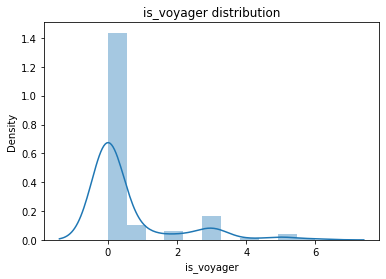


########## COLUMN: customerPhoneLen ##########


,Fraud
customerPhoneLen,
"(10.999, 12.0]",0.416667
"(12.0, 14.0]",0.440000
"(14.0, 16.0]",0.333333
"(16.0, 18.0]",0.261905
"(18.0, 20.0]",0.400000


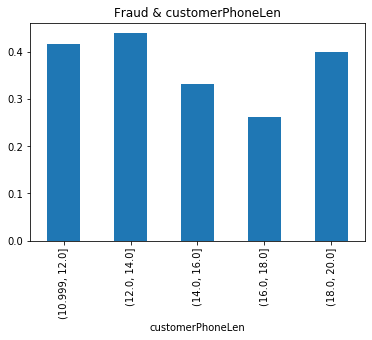

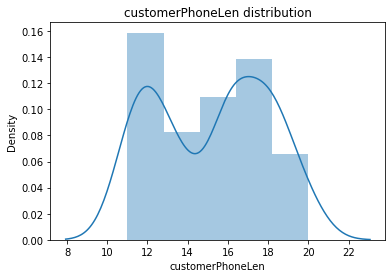


########## COLUMN: IPAddressLen ##########


,Fraud
IPAddressLen,
"(9.999, 13.0]",0.285714
"(13.0, 14.0]",0.500000
"(14.0, 38.0]",0.411765
"(38.0, 39.0]",0.297872


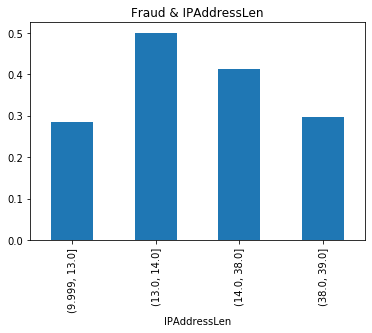

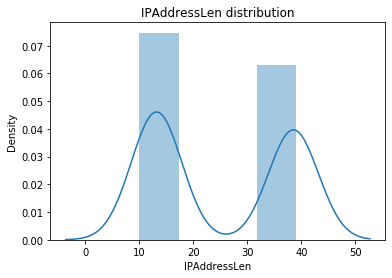


########## COLUMN: BillingAddressLen ##########


,Fraud
BillingAddressLen,
"(22.999, 40.0]",0.250000
"(40.0, 45.0]",0.393939
"(45.0, 50.0]",0.432432
"(50.0, 54.0]",0.333333
"(54.0, 65.0]",0.406250


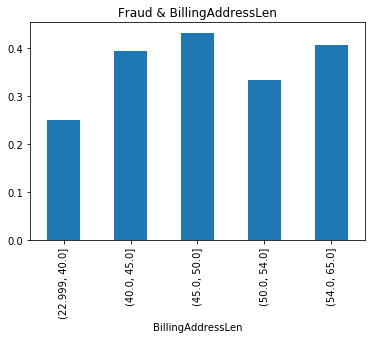

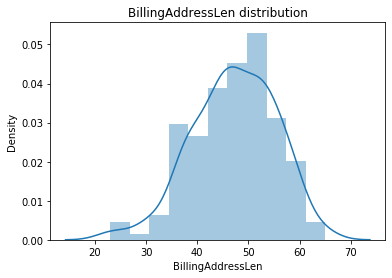


########## COLUMN: emailNameLen ##########


,Fraud
emailNameLen,
"(3.999, 7.0]",0.420000
"(7.0, 9.0]",0.324324
"(9.0, 10.0]",0.565217
"(10.0, 12.0]",0.250000
"(12.0, 19.0]",0.269231


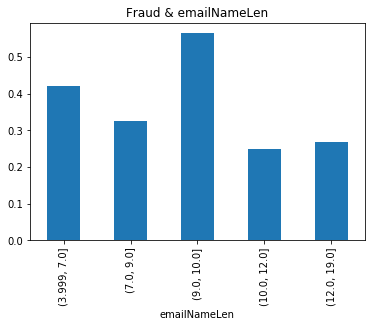

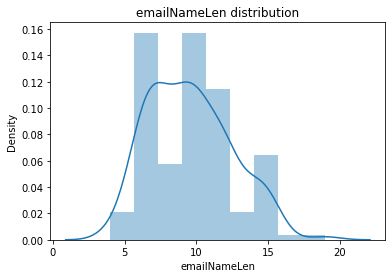

In [50]:
# Binning & Distribution Analysis
from scipy.stats import shapiro, anderson, skew, kurtosis
for i  in df.select_dtypes(exclude='object').drop('Fraud',axis=1).columns:
    
    # Binning
    print(f'\n########## COLUMN: {i} ##########')   
    X = df.groupby([pd.qcut(df[i], q=5, duplicates="drop")])['Fraud'].mean()
    Y = df.groupby([pd.cut(df[i], 5)])['Fraud'].mean()
    if len(X) != 1:
        display(X.to_frame())
        df.groupby([pd.qcut(df[i], q=5, duplicates="drop")])['Fraud'].mean().plot(kind='bar', title=f"Fraud & {i}")
        plt.show()
    else:
        display(Y.to_frame())
        df.groupby([pd.cut(df[i], 5)])['Fraud'].mean().plot(kind='bar', title=f"Fraud & {i}")
        plt.show()
        
    # Feature distribution
    plt.figure(figsize=(6,4))
    plt.title("{} distribution".format(i))
    sns.distplot(df[i])
    plt.show()

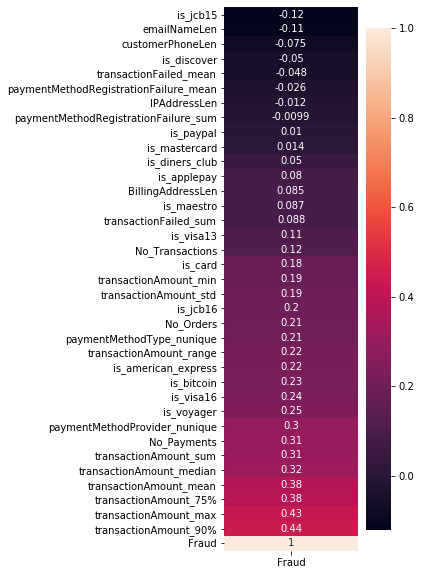

In [51]:
# spearman correlation (non-linear)
plt.figure(figsize=(3,10))
sns.heatmap(df.corr(method='spearman')[['Fraud']].sort_values('Fraud'), annot=True)

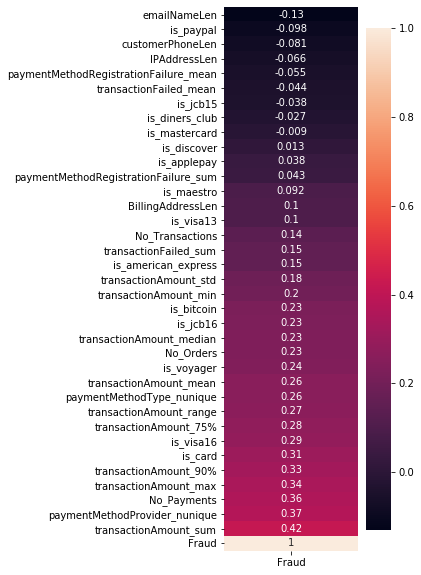

In [52]:
# pearson correlation (linear)
plt.figure(figsize=(3,10))
sns.heatmap(df.corr(method='pearson')[['Fraud']].sort_values('Fraud'), annot=True)

In [53]:
# nonparametric hypothesis testing towards target feature only
from scipy.stats import mannwhitneyu
mann = []
for i in df.drop(['Fraud'], axis=1).select_dtypes('number').columns:
    if mannwhitneyu(df[df['Fraud'] == 0][i], 
                    df[df['Fraud'] == 1][i])[1] < 0.05:
        mann.append('Reject Null Hypothesis')
    else:
        mann.append('Fail to Reject Null Hypothesis')

res = pd.DataFrame(data = [list(df.drop(['Fraud'], axis=1).select_dtypes('number').columns), mann]).T
res.columns = ['Columns', 'Hypothesis']
res

,Columns,Hypothesis
0,No_Transactions,Fail to Reject Null Hypothesis
1,No_Orders,Reject Null Hypothesis
2,No_Payments,Reject Null Hypothesis
3,paymentMethodType_nunique,Fail to Reject Null Hypothesis
4,paymentMethodProvider_nunique,Fail to Reject Null Hypothesis
5,paymentMethodRegistrationFailure_sum,Fail to Reject Null Hypothesis
6,paymentMethodRegistrationFailure_mean,Fail to Reject Null Hypothesis
7,transactionFailed_sum,Fail to Reject Null Hypothesis
8,transactionFailed_mean,Fail to Reject Null Hypothesis
9,transactionAmount_sum,Reject Null Hypothesis


In [54]:
# defining cramers v function to see the association between two categorical features
def cramers_v(x,y):
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r -((r-1)**2)/(n-1)
    kcorr = k -((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


# cramer's v value for each relevant categorical columns towards target variable
categorical_columns = df.iloc[:,6:].select_dtypes('object').columns
cramers = []
for i in categorical_columns:
    cramers.append(cramers_v(df['Fraud'], df[i]))
    
res = pd.DataFrame(data = [categorical_columns, cramers]).T 
res.columns = ['Column', 'Cramers_V']
res.sort_values(by = 'Cramers_V', ascending = False)

,Column,Cramers_V
1,emailTypeDomain,0.176326
2,Country,0.140688
0,emailType,0.099973


In [55]:
# defining Information Value (IV)
def iv_woe(data, target, bins=10, show_woe=False):
    
    # empty dataframe
    newDF, woeDF = pd.DataFrame(), pd.DataFrame()
    
    # extract column names
    cols = data.columns
    
    # run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        temp  = pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF = pd.concat([newDF,temp], axis=0)
        woeDF = pd.concat([woeDF,d], axis=0)

        # show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

# generating Information Value of features
iv, woe = iv_woe(data = df.iloc[:,6:], target = 'Fraud', bins=10, show_woe = False)
temp=pd.DataFrame(iv).sort_values('IV',ascending=False)

# getting only the features with desired threshold
display(temp)
considered_features = temp[(temp.IV >= 0.1)]['Variable'].unique().tolist()

,Variable,IV
0,transactionAmount_max,2.183190
0,transactionAmount_75%,1.986940
0,transactionAmount_90%,1.573898
0,transactionAmount_mean,1.403966
0,transactionAmount_sum,1.124396
0,transactionAmount_std,1.036701
0,No_Payments,0.908304
0,transactionAmount_min,0.849865
0,transactionAmount_median,0.828999
0,paymentMethodProvider_nunique,0.737655


In [56]:
# showcasing the considered features (above 0.1)
print(considered_features)

['transactionAmount_max', 'transactionAmount_75%', 'transactionAmount_90%', 'transactionAmount_mean', 'transactionAmount_sum', 'transactionAmount_std', 'No_Payments', 'transactionAmount_min', 'transactionAmount_median', 'paymentMethodProvider_nunique', 'is_visa16', 'transactionAmount_range', 'is_card', 'is_jcb16', 'transactionFailed_sum', 'No_Orders', 'paymentMethodType_nunique', 'is_american_express', 'transactionFailed_mean', 'is_voyager', 'is_bitcoin', 'Country', 'emailNameLen', 'emailTypeDomain', 'IPAddressLen', 'is_paypal', 'BillingAddressLen', 'emailType', 'is_applepay', 'is_maestro', 'paymentMethodRegistrationFailure_sum', 'is_visa13', 'customerPhoneLen']


# 7. Model Development

In [58]:
# data preprocessing the target variable
df['Fraud'] = df['Fraud']*1
display(df['Fraud'].head())
display(customer_df['Fraud'].head())

0    0
1    1
2    0
3    0
4    1
Name: Fraud, dtype: int32

0    False
1     True
2    False
3    False
4     True
Name: Fraud, dtype: bool

In [74]:
# the target proposition
df['Fraud'].value_counts()

0    107
1     61
Name: Fraud, dtype: int64

In [76]:
# the scale pos weight for target imbalance
scale_pos_weight = np.sqrt( df['Fraud'].value_counts()[0] / df['Fraud'].value_counts()[1] ) 
scale_pos_weight

1.3244237843891726

In [59]:
# length of current columns
len(df[considered_features].columns)

33

In [129]:
# assigning data
categorical_columns = sorted(categorical_columns)
data = df[sorted(considered_features)] 
target = df['Fraud']

# splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.30, random_state=101)

In [94]:
# fitting initial catboost to the data (it can handle missing values & categorical data beautifully)
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=15,
    random_seed=101
)

clf.fit(
    x_train, y_train,
    cat_features=categorical_columns,
    eval_set=(x_test, y_test),
)

Learning rate set to 0.115918
0:	learn: 0.6531711	test: 0.6509468	best: 0.6509468 (0)	total: 13.9ms	remaining: 195ms
1:	learn: 0.5974115	test: 0.5962237	best: 0.5962237 (1)	total: 29.4ms	remaining: 191ms
2:	learn: 0.5676126	test: 0.5849273	best: 0.5849273 (2)	total: 44.3ms	remaining: 177ms
3:	learn: 0.5364149	test: 0.5636580	best: 0.5636580 (3)	total: 65.1ms	remaining: 179ms
4:	learn: 0.5044772	test: 0.5500513	best: 0.5500513 (4)	total: 84.3ms	remaining: 169ms
5:	learn: 0.4809604	test: 0.5362164	best: 0.5362164 (5)	total: 105ms	remaining: 158ms
6:	learn: 0.4641773	test: 0.5218914	best: 0.5218914 (6)	total: 121ms	remaining: 138ms
7:	learn: 0.4440839	test: 0.5031883	best: 0.5031883 (7)	total: 140ms	remaining: 123ms
8:	learn: 0.4283937	test: 0.4869081	best: 0.4869081 (8)	total: 159ms	remaining: 106ms
9:	learn: 0.4150906	test: 0.4796129	best: 0.4796129 (9)	total: 174ms	remaining: 87.1ms
10:	learn: 0.4016714	test: 0.4702276	best: 0.4702276 (10)	total: 209ms	remaining: 76ms
11:	learn: 0.3900

In [105]:
# GridSearchCV for parameter tuning
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import LabelEncoder
test_params = { 
                'iterations':[10,15,20],
                'nan_mode':['Min','Max'],
                'depth': [4, 5, 6],
                'grow_policy': ['SymmetricTree','Depthwise','Lossguide'],
                'loss_function': ['Logloss', 'CrossEntropy'],
                'scale_pos_weight': [1, scale_pos_weight]
}


model = GridSearchCV(estimator = clf, param_grid = test_params, cv=5)
model.fit(x_train.apply(LabelEncoder().fit_transform), y_train)
print (f'Model = {model.best_params_}')
print(f'Score = {model.best_score_:.3}')

Learning rate set to 0.254962
0:	learn: 0.5957300	total: 963us	remaining: 8.67ms
1:	learn: 0.5273799	total: 1.99ms	remaining: 7.95ms
2:	learn: 0.5007932	total: 2.94ms	remaining: 6.87ms
3:	learn: 0.4728581	total: 4.02ms	remaining: 6.03ms
4:	learn: 0.4433985	total: 4.91ms	remaining: 4.91ms
5:	learn: 0.4077562	total: 5.89ms	remaining: 3.93ms
6:	learn: 0.3875824	total: 6.75ms	remaining: 2.89ms
7:	learn: 0.3661307	total: 7.72ms	remaining: 1.93ms
8:	learn: 0.3500422	total: 8.65ms	remaining: 961us
9:	learn: 0.3287821	total: 9.7ms	remaining: 0us
Learning rate set to 0.254962
0:	learn: 0.5915623	total: 1.63ms	remaining: 14.6ms
1:	learn: 0.5329353	total: 3.41ms	remaining: 13.6ms
2:	learn: 0.5088445	total: 5.11ms	remaining: 11.9ms
3:	learn: 0.4881319	total: 6.71ms	remaining: 10.1ms
4:	learn: 0.4582888	total: 8.43ms	remaining: 8.43ms
5:	learn: 0.4318141	total: 10.1ms	remaining: 6.75ms
6:	learn: 0.3958419	total: 11.8ms	remaining: 5.04ms
7:	learn: 0.3853261	total: 13.4ms	remaining: 3.35ms
8:	learn: 

0:	learn: 0.6098460	total: 2.04ms	remaining: 18.3ms
1:	learn: 0.5407220	total: 3.98ms	remaining: 15.9ms
2:	learn: 0.5165528	total: 5.8ms	remaining: 13.5ms
3:	learn: 0.4819216	total: 7.71ms	remaining: 11.6ms
4:	learn: 0.4396098	total: 9.53ms	remaining: 9.53ms
5:	learn: 0.4178573	total: 11.3ms	remaining: 7.53ms
6:	learn: 0.3798773	total: 13ms	remaining: 5.58ms
7:	learn: 0.3697575	total: 14.7ms	remaining: 3.69ms
8:	learn: 0.3485516	total: 16.9ms	remaining: 1.88ms
9:	learn: 0.3362531	total: 18.9ms	remaining: 0us
Learning rate set to 0.25613
0:	learn: 0.5852956	total: 2.09ms	remaining: 18.8ms
1:	learn: 0.5139304	total: 3.92ms	remaining: 15.7ms
2:	learn: 0.4886420	total: 5.75ms	remaining: 13.4ms
3:	learn: 0.4630798	total: 7.62ms	remaining: 11.4ms
4:	learn: 0.4525579	total: 9.54ms	remaining: 9.54ms
5:	learn: 0.4205975	total: 11.4ms	remaining: 7.59ms
6:	learn: 0.3937818	total: 13.2ms	remaining: 5.65ms
7:	learn: 0.3719109	total: 14.9ms	remaining: 3.74ms
8:	learn: 0.3504700	total: 16.9ms	remaini

0:	learn: 0.6218532	total: 1.97ms	remaining: 27.5ms
1:	learn: 0.5767933	total: 4.05ms	remaining: 26.3ms
2:	learn: 0.5536912	total: 5.88ms	remaining: 23.5ms
3:	learn: 0.5268787	total: 7.68ms	remaining: 21.1ms
4:	learn: 0.4928490	total: 9.56ms	remaining: 19.1ms
5:	learn: 0.4699902	total: 11.3ms	remaining: 17ms
6:	learn: 0.4523528	total: 13.1ms	remaining: 15ms
7:	learn: 0.4349530	total: 14.8ms	remaining: 13ms
8:	learn: 0.4152698	total: 16.7ms	remaining: 11.1ms
9:	learn: 0.4038914	total: 18.7ms	remaining: 9.34ms
10:	learn: 0.3791826	total: 20.8ms	remaining: 7.57ms
11:	learn: 0.3686135	total: 23ms	remaining: 5.74ms
12:	learn: 0.3560984	total: 25.1ms	remaining: 3.86ms
13:	learn: 0.3477321	total: 27.2ms	remaining: 1.94ms
14:	learn: 0.3407210	total: 29.1ms	remaining: 0us
Learning rate set to 0.175793
0:	learn: 0.6221688	total: 1.56ms	remaining: 21.8ms
1:	learn: 0.5643944	total: 3.25ms	remaining: 21.1ms
2:	learn: 0.5180711	total: 5.15ms	remaining: 20.6ms
3:	learn: 0.4961824	total: 6.9ms	remaini

0:	learn: 0.6346079	total: 1.83ms	remaining: 34.7ms
1:	learn: 0.5932800	total: 3.6ms	remaining: 32.4ms
2:	learn: 0.5769100	total: 5.39ms	remaining: 30.6ms
3:	learn: 0.5444689	total: 7.2ms	remaining: 28.8ms
4:	learn: 0.5361036	total: 9.1ms	remaining: 27.3ms
5:	learn: 0.5153782	total: 10.9ms	remaining: 25.5ms
6:	learn: 0.4835746	total: 12.8ms	remaining: 23.8ms
7:	learn: 0.4676847	total: 14.6ms	remaining: 21.8ms
8:	learn: 0.4549781	total: 16.3ms	remaining: 19.9ms
9:	learn: 0.4426542	total: 18.2ms	remaining: 18.2ms
10:	learn: 0.4170932	total: 20.3ms	remaining: 16.6ms
11:	learn: 0.4051556	total: 22.5ms	remaining: 15ms
12:	learn: 0.3898888	total: 24.7ms	remaining: 13.3ms
13:	learn: 0.3654092	total: 26.8ms	remaining: 11.5ms
14:	learn: 0.3550695	total: 28.8ms	remaining: 9.6ms
15:	learn: 0.3435324	total: 30.7ms	remaining: 7.69ms
16:	learn: 0.3342517	total: 32.6ms	remaining: 5.74ms
17:	learn: 0.3222986	total: 34.3ms	remaining: 3.81ms
18:	learn: 0.3119566	total: 36.2ms	remaining: 1.9ms
19:	learn:

0:	learn: 0.6366077	total: 2.79ms	remaining: 53.1ms
1:	learn: 0.5985258	total: 5.76ms	remaining: 51.9ms
2:	learn: 0.5786313	total: 7.8ms	remaining: 44.2ms
3:	learn: 0.5564241	total: 10.2ms	remaining: 40.8ms
4:	learn: 0.5288316	total: 12.6ms	remaining: 37.9ms
5:	learn: 0.5075769	total: 14.9ms	remaining: 34.9ms
6:	learn: 0.4856405	total: 17.3ms	remaining: 32.1ms
7:	learn: 0.4637027	total: 20ms	remaining: 30ms
8:	learn: 0.4463938	total: 22.1ms	remaining: 27ms
9:	learn: 0.4364419	total: 24.4ms	remaining: 24.4ms
10:	learn: 0.4160732	total: 27.2ms	remaining: 22.3ms
11:	learn: 0.4045975	total: 29.9ms	remaining: 19.9ms
12:	learn: 0.3850023	total: 32.1ms	remaining: 17.3ms
13:	learn: 0.3755478	total: 34.7ms	remaining: 14.9ms
14:	learn: 0.3696935	total: 37.1ms	remaining: 12.4ms
15:	learn: 0.3575278	total: 39.3ms	remaining: 9.82ms
16:	learn: 0.3489014	total: 41.7ms	remaining: 7.37ms
17:	learn: 0.3365618	total: 44ms	remaining: 4.88ms
18:	learn: 0.3284109	total: 46.2ms	remaining: 2.43ms
19:	learn: 0

Learning rate set to 0.135649
0:	learn: 0.6560088	total: 3.13ms	remaining: 59.4ms
1:	learn: 0.6164086	total: 6.42ms	remaining: 57.8ms
2:	learn: 0.5973617	total: 9.91ms	remaining: 56.2ms
3:	learn: 0.5769770	total: 13.1ms	remaining: 52.3ms
4:	learn: 0.5508959	total: 16.3ms	remaining: 48.8ms
5:	learn: 0.5344422	total: 19.9ms	remaining: 46.4ms
6:	learn: 0.5044107	total: 23.3ms	remaining: 43.2ms
7:	learn: 0.4930972	total: 26.4ms	remaining: 39.5ms
8:	learn: 0.4803554	total: 29.4ms	remaining: 35.9ms
9:	learn: 0.4714426	total: 32.5ms	remaining: 32.5ms
10:	learn: 0.4480380	total: 35.9ms	remaining: 29.4ms
11:	learn: 0.4361698	total: 39.1ms	remaining: 26ms
12:	learn: 0.4219776	total: 42.3ms	remaining: 22.8ms
13:	learn: 0.4038784	total: 45.5ms	remaining: 19.5ms
14:	learn: 0.3936976	total: 48.5ms	remaining: 16.2ms
15:	learn: 0.3883832	total: 51.9ms	remaining: 13ms
16:	learn: 0.3786470	total: 55ms	remaining: 9.71ms
17:	learn: 0.3693142	total: 58ms	remaining: 6.44ms
18:	learn: 0.3636393	total: 60.9ms

Learning rate set to 0.25613
0:	learn: 0.5914696	total: 4.72ms	remaining: 42.5ms
1:	learn: 0.5142121	total: 9.58ms	remaining: 38.3ms
2:	learn: 0.4387202	total: 14.1ms	remaining: 32.9ms
3:	learn: 0.3892693	total: 19.2ms	remaining: 28.8ms
4:	learn: 0.3663251	total: 23.6ms	remaining: 23.6ms
5:	learn: 0.3513656	total: 28.5ms	remaining: 19ms
6:	learn: 0.3127699	total: 34.5ms	remaining: 14.8ms
7:	learn: 0.2791035	total: 39.3ms	remaining: 9.84ms
8:	learn: 0.2575746	total: 43.9ms	remaining: 4.88ms
9:	learn: 0.2411790	total: 49.1ms	remaining: 0us
Learning rate set to 0.25613
0:	learn: 0.5681009	total: 4.45ms	remaining: 40ms
1:	learn: 0.5167263	total: 9.02ms	remaining: 36.1ms
2:	learn: 0.4573030	total: 14.2ms	remaining: 33.2ms
3:	learn: 0.4078867	total: 18.9ms	remaining: 28.4ms
4:	learn: 0.3798539	total: 23.4ms	remaining: 23.4ms
5:	learn: 0.3471517	total: 28.2ms	remaining: 18.8ms
6:	learn: 0.3294739	total: 32.7ms	remaining: 14ms
7:	learn: 0.3058677	total: 37.1ms	remaining: 9.28ms
8:	learn: 0.283

5:	learn: 0.4115947	total: 23ms	remaining: 34.6ms
6:	learn: 0.3770620	total: 27.6ms	remaining: 31.6ms
7:	learn: 0.3617795	total: 31.2ms	remaining: 27.3ms
8:	learn: 0.3522572	total: 34.8ms	remaining: 23.2ms
9:	learn: 0.3372509	total: 38.3ms	remaining: 19.1ms
10:	learn: 0.3139714	total: 42.5ms	remaining: 15.5ms
11:	learn: 0.2905819	total: 46.6ms	remaining: 11.6ms
12:	learn: 0.2746859	total: 50.5ms	remaining: 7.77ms
13:	learn: 0.2634089	total: 54.8ms	remaining: 3.92ms
14:	learn: 0.2430071	total: 60.4ms	remaining: 0us
Learning rate set to 0.176597
0:	learn: 0.6034308	total: 3.72ms	remaining: 52.1ms
1:	learn: 0.5469561	total: 7.33ms	remaining: 47.7ms
2:	learn: 0.4883428	total: 11.1ms	remaining: 44.3ms
3:	learn: 0.4452181	total: 14.4ms	remaining: 39.5ms
4:	learn: 0.4131281	total: 18.1ms	remaining: 36.1ms
5:	learn: 0.3831973	total: 21.5ms	remaining: 32.3ms
6:	learn: 0.3587223	total: 25.4ms	remaining: 29ms
7:	learn: 0.3222370	total: 29.1ms	remaining: 25.5ms
8:	learn: 0.3083225	total: 32.5ms	re

0:	learn: 0.6034308	total: 5.37ms	remaining: 75.2ms
1:	learn: 0.5469561	total: 10.6ms	remaining: 68.6ms
2:	learn: 0.4883428	total: 15ms	remaining: 59.8ms
3:	learn: 0.4452181	total: 19.5ms	remaining: 53.5ms
4:	learn: 0.4131281	total: 23.6ms	remaining: 47.1ms
5:	learn: 0.3831973	total: 28.4ms	remaining: 42.5ms
6:	learn: 0.3587223	total: 33.6ms	remaining: 38.4ms
7:	learn: 0.3222370	total: 39.1ms	remaining: 34.2ms
8:	learn: 0.3083225	total: 42.9ms	remaining: 28.6ms
9:	learn: 0.2940593	total: 47.1ms	remaining: 23.6ms
10:	learn: 0.2742648	total: 51.4ms	remaining: 18.7ms
11:	learn: 0.2516598	total: 55.2ms	remaining: 13.8ms
12:	learn: 0.2394709	total: 58.7ms	remaining: 9.03ms
13:	learn: 0.2184850	total: 62.9ms	remaining: 4.49ms
14:	learn: 0.2058855	total: 66.9ms	remaining: 0us
Learning rate set to 0.176597
0:	learn: 0.6232668	total: 4.12ms	remaining: 57.7ms
1:	learn: 0.5634497	total: 8.19ms	remaining: 53.2ms
2:	learn: 0.5380695	total: 11.6ms	remaining: 46.6ms
3:	learn: 0.4988046	total: 15.3ms	

Learning rate set to 0.13503
0:	learn: 0.6455867	total: 3.52ms	remaining: 66.8ms
1:	learn: 0.5964644	total: 8.1ms	remaining: 72.9ms
2:	learn: 0.5646246	total: 12.5ms	remaining: 70.7ms
3:	learn: 0.5273068	total: 16.6ms	remaining: 66.2ms
4:	learn: 0.4816857	total: 20.8ms	remaining: 62.4ms
5:	learn: 0.4540478	total: 24.5ms	remaining: 57.2ms
6:	learn: 0.4332594	total: 28.5ms	remaining: 53ms
7:	learn: 0.4139171	total: 32.7ms	remaining: 49.1ms
8:	learn: 0.3852019	total: 36.9ms	remaining: 45.1ms
9:	learn: 0.3725561	total: 40.3ms	remaining: 40.3ms
10:	learn: 0.3435807	total: 44.3ms	remaining: 36.2ms
11:	learn: 0.3204822	total: 48.1ms	remaining: 32.1ms
12:	learn: 0.3081104	total: 51.8ms	remaining: 27.9ms
13:	learn: 0.3004445	total: 55.5ms	remaining: 23.8ms
14:	learn: 0.2774758	total: 59.5ms	remaining: 19.8ms
15:	learn: 0.2613458	total: 63.2ms	remaining: 15.8ms
16:	learn: 0.2499568	total: 66.9ms	remaining: 11.8ms
17:	learn: 0.2362480	total: 70.5ms	remaining: 7.83ms
18:	learn: 0.2240348	total: 74

10:	learn: 0.3365719	total: 40.1ms	remaining: 32.8ms
11:	learn: 0.3110068	total: 45.4ms	remaining: 30.2ms
12:	learn: 0.3053876	total: 49ms	remaining: 26.4ms
13:	learn: 0.2936008	total: 53ms	remaining: 22.7ms
14:	learn: 0.2780447	total: 56.8ms	remaining: 18.9ms
15:	learn: 0.2607481	total: 60.9ms	remaining: 15.2ms
16:	learn: 0.2530614	total: 65.5ms	remaining: 11.6ms
17:	learn: 0.2409303	total: 70.2ms	remaining: 7.8ms
18:	learn: 0.2273144	total: 74.7ms	remaining: 3.93ms
19:	learn: 0.2211199	total: 79.1ms	remaining: 0us
Learning rate set to 0.13503
0:	learn: 0.6247508	total: 3.32ms	remaining: 63.1ms
1:	learn: 0.5775021	total: 6.42ms	remaining: 57.8ms
2:	learn: 0.5433452	total: 9.97ms	remaining: 56.5ms
3:	learn: 0.5181675	total: 13.1ms	remaining: 52.6ms
4:	learn: 0.4786878	total: 16.1ms	remaining: 48.2ms
5:	learn: 0.4478800	total: 19.1ms	remaining: 44.6ms
6:	learn: 0.4223210	total: 22.5ms	remaining: 41.8ms
7:	learn: 0.3971565	total: 25.6ms	remaining: 38.5ms
8:	learn: 0.3698904	total: 29ms	r

Learning rate set to 0.254962
0:	learn: 0.6013253	total: 4.37ms	remaining: 39.3ms
1:	learn: 0.5137602	total: 8.36ms	remaining: 33.4ms
2:	learn: 0.4778908	total: 12ms	remaining: 28ms
3:	learn: 0.4529045	total: 15.9ms	remaining: 23.8ms
4:	learn: 0.4206683	total: 20.4ms	remaining: 20.4ms
5:	learn: 0.3820370	total: 24.6ms	remaining: 16.4ms
6:	learn: 0.3500883	total: 28.2ms	remaining: 12.1ms
7:	learn: 0.3216450	total: 32.8ms	remaining: 8.21ms
8:	learn: 0.2784349	total: 37ms	remaining: 4.11ms
9:	learn: 0.2547589	total: 40.5ms	remaining: 0us
Learning rate set to 0.25613
0:	learn: 0.5630899	total: 4.37ms	remaining: 39.3ms
1:	learn: 0.4573860	total: 8.84ms	remaining: 35.3ms
2:	learn: 0.4153381	total: 13ms	remaining: 30.4ms
3:	learn: 0.3486478	total: 17.4ms	remaining: 26.2ms
4:	learn: 0.3335125	total: 21.8ms	remaining: 21.8ms
5:	learn: 0.2954969	total: 25.7ms	remaining: 17.1ms
6:	learn: 0.2716527	total: 29.4ms	remaining: 12.6ms
7:	learn: 0.2419671	total: 33.8ms	remaining: 8.44ms
8:	learn: 0.2276

0:	learn: 0.6051553	total: 4.16ms	remaining: 58.2ms
1:	learn: 0.5537661	total: 8.03ms	remaining: 52.2ms
2:	learn: 0.5161341	total: 11.3ms	remaining: 45.2ms
3:	learn: 0.4545572	total: 14.5ms	remaining: 40ms
4:	learn: 0.4230060	total: 18ms	remaining: 36ms
5:	learn: 0.4025363	total: 21.5ms	remaining: 32.2ms
6:	learn: 0.3588985	total: 25.2ms	remaining: 28.8ms
7:	learn: 0.3296461	total: 29.6ms	remaining: 25.9ms
8:	learn: 0.3142995	total: 32.9ms	remaining: 21.9ms
9:	learn: 0.3032062	total: 35.9ms	remaining: 17.9ms
10:	learn: 0.2840896	total: 39.6ms	remaining: 14.4ms
11:	learn: 0.2706322	total: 43.2ms	remaining: 10.8ms
12:	learn: 0.2542084	total: 46.5ms	remaining: 7.15ms
13:	learn: 0.2450099	total: 49.9ms	remaining: 3.57ms
14:	learn: 0.2400267	total: 53.5ms	remaining: 0us
Learning rate set to 0.176597
0:	learn: 0.6105172	total: 3.3ms	remaining: 46.3ms
1:	learn: 0.5558112	total: 6.88ms	remaining: 44.7ms
2:	learn: 0.5280574	total: 10ms	remaining: 40ms
3:	learn: 0.4726876	total: 13.6ms	remaining

5:	learn: 0.3993380	total: 37.4ms	remaining: 56.1ms
6:	learn: 0.3846075	total: 42.6ms	remaining: 48.7ms
7:	learn: 0.3663004	total: 49.3ms	remaining: 43.2ms
8:	learn: 0.3489280	total: 54.9ms	remaining: 36.6ms
9:	learn: 0.3280004	total: 61.9ms	remaining: 31ms
10:	learn: 0.3089755	total: 69.2ms	remaining: 25.2ms
11:	learn: 0.2805204	total: 76.7ms	remaining: 19.2ms
12:	learn: 0.2659416	total: 83.8ms	remaining: 12.9ms
13:	learn: 0.2504065	total: 90.1ms	remaining: 6.44ms
14:	learn: 0.2380479	total: 96.5ms	remaining: 0us
Learning rate set to 0.175793
0:	learn: 0.6038017	total: 5.08ms	remaining: 71.2ms
1:	learn: 0.5373735	total: 10.6ms	remaining: 69.2ms
2:	learn: 0.4718763	total: 16.2ms	remaining: 64.7ms
3:	learn: 0.4285862	total: 21.3ms	remaining: 58.5ms
4:	learn: 0.3920869	total: 26.8ms	remaining: 53.7ms
5:	learn: 0.3685457	total: 32.5ms	remaining: 48.8ms
6:	learn: 0.3430387	total: 38.7ms	remaining: 44.3ms
7:	learn: 0.3166320	total: 44.7ms	remaining: 39.1ms
8:	learn: 0.3032786	total: 50.3ms	

Learning rate set to 0.135649
0:	learn: 0.6278427	total: 5.34ms	remaining: 101ms
1:	learn: 0.5811864	total: 10.8ms	remaining: 97.1ms
2:	learn: 0.5575713	total: 16.2ms	remaining: 91.6ms
3:	learn: 0.5078545	total: 21.7ms	remaining: 86.6ms
4:	learn: 0.4699003	total: 26.5ms	remaining: 79.4ms
5:	learn: 0.4395493	total: 30.4ms	remaining: 71ms
6:	learn: 0.4252860	total: 34.6ms	remaining: 64.3ms
7:	learn: 0.4082202	total: 39.6ms	remaining: 59.4ms
8:	learn: 0.3986137	total: 44ms	remaining: 53.7ms
9:	learn: 0.3755204	total: 49.4ms	remaining: 49.4ms
10:	learn: 0.3577002	total: 54.5ms	remaining: 44.6ms
11:	learn: 0.3390047	total: 59.8ms	remaining: 39.8ms
12:	learn: 0.3180639	total: 64.4ms	remaining: 34.7ms
13:	learn: 0.2977394	total: 69.7ms	remaining: 29.9ms
14:	learn: 0.2900516	total: 75ms	remaining: 25ms
15:	learn: 0.2735634	total: 79.8ms	remaining: 19.9ms
16:	learn: 0.2643686	total: 84.4ms	remaining: 14.9ms
17:	learn: 0.2544427	total: 89.2ms	remaining: 9.91ms
18:	learn: 0.2350481	total: 94ms	re

11:	learn: 0.2850770	total: 59.6ms	remaining: 39.7ms
12:	learn: 0.2694094	total: 64ms	remaining: 34.5ms
13:	learn: 0.2531686	total: 69ms	remaining: 29.6ms
14:	learn: 0.2365584	total: 74ms	remaining: 24.7ms
15:	learn: 0.2219494	total: 79.1ms	remaining: 19.8ms
16:	learn: 0.2121246	total: 83.9ms	remaining: 14.8ms
17:	learn: 0.2053438	total: 88.8ms	remaining: 9.87ms
18:	learn: 0.1984518	total: 94.3ms	remaining: 4.96ms
19:	learn: 0.1907473	total: 98.9ms	remaining: 0us
Learning rate set to 0.135649
0:	learn: 0.6234910	total: 3.94ms	remaining: 74.8ms
1:	learn: 0.5803111	total: 7.9ms	remaining: 71.1ms
2:	learn: 0.5461342	total: 11.6ms	remaining: 65.5ms
3:	learn: 0.5194708	total: 14.8ms	remaining: 59.3ms
4:	learn: 0.4907555	total: 18.6ms	remaining: 55.8ms
5:	learn: 0.4753965	total: 21.7ms	remaining: 50.6ms
6:	learn: 0.4616947	total: 24.5ms	remaining: 45.5ms
7:	learn: 0.4412858	total: 28.1ms	remaining: 42.1ms
8:	learn: 0.4182798	total: 31.6ms	remaining: 38.6ms
9:	learn: 0.3916068	total: 35.2ms	r

0:	learn: 0.5858578	total: 2.34ms	remaining: 21ms
1:	learn: 0.5287491	total: 4.52ms	remaining: 18.1ms
2:	learn: 0.4743060	total: 6.49ms	remaining: 15.1ms
3:	learn: 0.4277936	total: 8.7ms	remaining: 13ms
4:	learn: 0.3769749	total: 10.7ms	remaining: 10.7ms
5:	learn: 0.3463178	total: 13.2ms	remaining: 8.81ms
6:	learn: 0.3234881	total: 15.3ms	remaining: 6.54ms
7:	learn: 0.3096818	total: 17.5ms	remaining: 4.37ms
8:	learn: 0.2885470	total: 19.6ms	remaining: 2.18ms
9:	learn: 0.2698706	total: 21.6ms	remaining: 0us
Learning rate set to 0.25613
0:	learn: 0.5786881	total: 1.73ms	remaining: 15.5ms
1:	learn: 0.5005622	total: 3.76ms	remaining: 15ms
2:	learn: 0.4455832	total: 5.83ms	remaining: 13.6ms
3:	learn: 0.3938661	total: 7.76ms	remaining: 11.6ms
4:	learn: 0.3665372	total: 9.76ms	remaining: 9.76ms
5:	learn: 0.3336167	total: 11.7ms	remaining: 7.82ms
6:	learn: 0.3156965	total: 13.7ms	remaining: 5.86ms
7:	learn: 0.2943357	total: 15.6ms	remaining: 3.9ms
8:	learn: 0.2632561	total: 17.5ms	remaining: 1

1:	learn: 0.5134276	total: 5.51ms	remaining: 22ms
2:	learn: 0.4572823	total: 8.38ms	remaining: 19.5ms
3:	learn: 0.4051572	total: 11.1ms	remaining: 16.7ms
4:	learn: 0.3774171	total: 13.7ms	remaining: 13.7ms
5:	learn: 0.3434319	total: 16.1ms	remaining: 10.7ms
6:	learn: 0.3208386	total: 18.5ms	remaining: 7.92ms
7:	learn: 0.2993345	total: 21ms	remaining: 5.25ms
8:	learn: 0.2728896	total: 23.2ms	remaining: 2.57ms
9:	learn: 0.2583573	total: 25.8ms	remaining: 0us
Learning rate set to 0.25613
0:	learn: 0.6289914	total: 1.96ms	remaining: 17.7ms
1:	learn: 0.5521527	total: 4.37ms	remaining: 17.5ms
2:	learn: 0.5250914	total: 6.66ms	remaining: 15.5ms
3:	learn: 0.4782663	total: 9.08ms	remaining: 13.6ms
4:	learn: 0.4405491	total: 11.4ms	remaining: 11.4ms
5:	learn: 0.4051375	total: 13.7ms	remaining: 9.1ms
6:	learn: 0.3792996	total: 16.1ms	remaining: 6.88ms
7:	learn: 0.3525523	total: 18.6ms	remaining: 4.64ms
8:	learn: 0.3251889	total: 21ms	remaining: 2.33ms
9:	learn: 0.3011581	total: 23.1ms	remaining: 

2:	learn: 0.5238165	total: 7.09ms	remaining: 28.4ms
3:	learn: 0.4751909	total: 10.1ms	remaining: 27.7ms
4:	learn: 0.4423403	total: 12.6ms	remaining: 25.2ms
5:	learn: 0.4283433	total: 14.7ms	remaining: 22.1ms
6:	learn: 0.4069745	total: 16.9ms	remaining: 19.3ms
7:	learn: 0.3802137	total: 19ms	remaining: 16.6ms
8:	learn: 0.3548281	total: 21.5ms	remaining: 14.3ms
9:	learn: 0.3325226	total: 23.5ms	remaining: 11.8ms
10:	learn: 0.3187342	total: 25.8ms	remaining: 9.38ms
11:	learn: 0.3010347	total: 27.9ms	remaining: 6.97ms
12:	learn: 0.2905174	total: 30.3ms	remaining: 4.67ms
13:	learn: 0.2819982	total: 32.8ms	remaining: 2.34ms
14:	learn: 0.2597326	total: 35.3ms	remaining: 0us
Learning rate set to 0.175793
0:	learn: 0.6150364	total: 2.64ms	remaining: 37ms
1:	learn: 0.5663762	total: 5.1ms	remaining: 33.2ms
2:	learn: 0.5199068	total: 7.65ms	remaining: 30.6ms
3:	learn: 0.4775963	total: 9.81ms	remaining: 27ms
4:	learn: 0.4508477	total: 12.2ms	remaining: 24.3ms
5:	learn: 0.4165362	total: 14.5ms	remai

10:	learn: 0.3449694	total: 40.3ms	remaining: 32.9ms
11:	learn: 0.3343580	total: 43.2ms	remaining: 28.8ms
12:	learn: 0.3167784	total: 47ms	remaining: 25.3ms
13:	learn: 0.3094817	total: 50.4ms	remaining: 21.6ms
14:	learn: 0.2892043	total: 54.2ms	remaining: 18.1ms
15:	learn: 0.2799248	total: 58ms	remaining: 14.5ms
16:	learn: 0.2711613	total: 61.5ms	remaining: 10.8ms
17:	learn: 0.2635318	total: 65.5ms	remaining: 7.28ms
18:	learn: 0.2527712	total: 69.1ms	remaining: 3.64ms
19:	learn: 0.2439012	total: 73ms	remaining: 0us
Learning rate set to 0.135649
0:	learn: 0.6264359	total: 1.77ms	remaining: 33.6ms
1:	learn: 0.5703609	total: 4.02ms	remaining: 36.2ms
2:	learn: 0.5346496	total: 6.09ms	remaining: 34.5ms
3:	learn: 0.4939689	total: 8.19ms	remaining: 32.8ms
4:	learn: 0.4692237	total: 10.6ms	remaining: 31.8ms
5:	learn: 0.4470575	total: 12.8ms	remaining: 29.8ms
6:	learn: 0.4267660	total: 15ms	remaining: 27.8ms
7:	learn: 0.4042349	total: 17.1ms	remaining: 25.7ms
8:	learn: 0.3795557	total: 19.2ms	r

14:	learn: 0.3079630	total: 44.4ms	remaining: 14.8ms
15:	learn: 0.2954605	total: 47.4ms	remaining: 11.8ms
16:	learn: 0.2839851	total: 50.6ms	remaining: 8.92ms
17:	learn: 0.2738178	total: 53.9ms	remaining: 5.98ms
18:	learn: 0.2575001	total: 57.3ms	remaining: 3.01ms
19:	learn: 0.2493050	total: 60.9ms	remaining: 0us
Learning rate set to 0.13503
0:	learn: 0.6314962	total: 3ms	remaining: 56.9ms
1:	learn: 0.5898989	total: 6.69ms	remaining: 60.2ms
2:	learn: 0.5504329	total: 10.7ms	remaining: 60.7ms
3:	learn: 0.5136225	total: 14.5ms	remaining: 58.2ms
4:	learn: 0.4869436	total: 18.4ms	remaining: 55.1ms
5:	learn: 0.4575807	total: 22.2ms	remaining: 51.9ms
6:	learn: 0.4307129	total: 26ms	remaining: 48.3ms
7:	learn: 0.4134718	total: 30.1ms	remaining: 45.2ms
8:	learn: 0.3961960	total: 34ms	remaining: 41.6ms
9:	learn: 0.3815921	total: 38ms	remaining: 38ms
10:	learn: 0.3449694	total: 41.8ms	remaining: 34.2ms
11:	learn: 0.3343580	total: 45ms	remaining: 30ms
12:	learn: 0.3167784	total: 49.1ms	remaining:

15:	learn: 0.3313475	total: 52.1ms	remaining: 13ms
16:	learn: 0.3209721	total: 55.6ms	remaining: 9.81ms
17:	learn: 0.3153471	total: 58.8ms	remaining: 6.53ms
18:	learn: 0.3056831	total: 61.9ms	remaining: 3.26ms
19:	learn: 0.2987696	total: 64.9ms	remaining: 0us
Learning rate set to 0.135649
0:	learn: 0.6414880	total: 3.52ms	remaining: 66.8ms
1:	learn: 0.6063561	total: 6.27ms	remaining: 56.4ms
2:	learn: 0.5728817	total: 9.5ms	remaining: 53.8ms
3:	learn: 0.5391377	total: 12.4ms	remaining: 49.7ms
4:	learn: 0.5156008	total: 15.5ms	remaining: 46.5ms
5:	learn: 0.4948784	total: 18.6ms	remaining: 43.3ms
6:	learn: 0.4709553	total: 21.4ms	remaining: 39.8ms
7:	learn: 0.4394325	total: 24.8ms	remaining: 37.2ms
8:	learn: 0.4248891	total: 27.7ms	remaining: 33.9ms
9:	learn: 0.4097659	total: 31ms	remaining: 31ms
10:	learn: 0.3832268	total: 33.8ms	remaining: 27.7ms
11:	learn: 0.3690547	total: 36.4ms	remaining: 24.3ms
12:	learn: 0.3570359	total: 39.8ms	remaining: 21.4ms
13:	learn: 0.3496515	total: 42.9ms	r

6:	learn: 0.2288378	total: 38.1ms	remaining: 16.3ms
7:	learn: 0.2095463	total: 44.4ms	remaining: 11.1ms
8:	learn: 0.1966439	total: 48.8ms	remaining: 5.42ms
9:	learn: 0.1763190	total: 53.7ms	remaining: 0us
Learning rate set to 0.25613
0:	learn: 0.5862243	total: 3.37ms	remaining: 30.3ms
1:	learn: 0.5006520	total: 6.66ms	remaining: 26.6ms
2:	learn: 0.4391872	total: 10.1ms	remaining: 23.5ms
3:	learn: 0.3998550	total: 13.7ms	remaining: 20.6ms
4:	learn: 0.3413965	total: 17ms	remaining: 17ms
5:	learn: 0.2898164	total: 20.5ms	remaining: 13.7ms
6:	learn: 0.2644149	total: 24.3ms	remaining: 10.4ms
7:	learn: 0.2477233	total: 27.2ms	remaining: 6.81ms
8:	learn: 0.2273981	total: 31ms	remaining: 3.44ms
9:	learn: 0.1933348	total: 34.8ms	remaining: 0us
Learning rate set to 0.25613
0:	learn: 0.5630146	total: 4.11ms	remaining: 37ms
1:	learn: 0.4672728	total: 8.73ms	remaining: 34.9ms
2:	learn: 0.4068253	total: 14.4ms	remaining: 33.6ms
3:	learn: 0.3674381	total: 19.4ms	remaining: 29ms
4:	learn: 0.3379108	to

7:	learn: 0.2785140	total: 38.1ms	remaining: 33.4ms
8:	learn: 0.2627681	total: 44ms	remaining: 29.3ms
9:	learn: 0.2334443	total: 49.2ms	remaining: 24.6ms
10:	learn: 0.2160794	total: 54.5ms	remaining: 19.8ms
11:	learn: 0.2057224	total: 59.9ms	remaining: 15ms
12:	learn: 0.1876266	total: 65.6ms	remaining: 10.1ms
13:	learn: 0.1787631	total: 71.1ms	remaining: 5.08ms
14:	learn: 0.1709032	total: 76.7ms	remaining: 0us
Learning rate set to 0.175793
0:	learn: 0.6308253	total: 4.7ms	remaining: 65.8ms
1:	learn: 0.5627080	total: 12.4ms	remaining: 80.4ms
2:	learn: 0.4950567	total: 18.7ms	remaining: 75ms
3:	learn: 0.4382507	total: 25.2ms	remaining: 69.2ms
4:	learn: 0.4099557	total: 30.5ms	remaining: 60.9ms
5:	learn: 0.3737686	total: 36.7ms	remaining: 55.1ms
6:	learn: 0.3301855	total: 43.2ms	remaining: 49.3ms
7:	learn: 0.3082795	total: 50ms	remaining: 43.7ms
8:	learn: 0.2891071	total: 55.9ms	remaining: 37.3ms
9:	learn: 0.2630932	total: 62.2ms	remaining: 31.1ms
10:	learn: 0.2492553	total: 69.1ms	remain

4:	learn: 0.4099557	total: 26.4ms	remaining: 52.7ms
5:	learn: 0.3737686	total: 32ms	remaining: 48ms
6:	learn: 0.3301855	total: 37.2ms	remaining: 42.6ms
7:	learn: 0.3082795	total: 43.1ms	remaining: 37.7ms
8:	learn: 0.2891071	total: 47.9ms	remaining: 31.9ms
9:	learn: 0.2630932	total: 53.4ms	remaining: 26.7ms
10:	learn: 0.2492553	total: 59.2ms	remaining: 21.5ms
11:	learn: 0.2330953	total: 90ms	remaining: 22.5ms
12:	learn: 0.2214638	total: 95ms	remaining: 14.6ms
13:	learn: 0.2002827	total: 105ms	remaining: 7.52ms
14:	learn: 0.1780592	total: 112ms	remaining: 0us
Learning rate set to 0.176597
0:	learn: 0.6035064	total: 3.66ms	remaining: 51.3ms
1:	learn: 0.5338502	total: 7.34ms	remaining: 47.7ms
2:	learn: 0.4654509	total: 11ms	remaining: 44.1ms
3:	learn: 0.4201252	total: 14.8ms	remaining: 40.6ms
4:	learn: 0.3751029	total: 18.7ms	remaining: 37.3ms
5:	learn: 0.3320569	total: 22.7ms	remaining: 34.1ms
6:	learn: 0.2972114	total: 26.5ms	remaining: 30.3ms
7:	learn: 0.2557845	total: 30.3ms	remaining:

0:	learn: 0.6073495	total: 6.46ms	remaining: 123ms
1:	learn: 0.5487154	total: 11.6ms	remaining: 104ms
2:	learn: 0.5113416	total: 17.2ms	remaining: 97.6ms
3:	learn: 0.4734461	total: 22.3ms	remaining: 89ms
4:	learn: 0.4473911	total: 27.9ms	remaining: 83.8ms
5:	learn: 0.4166910	total: 33.6ms	remaining: 78.4ms
6:	learn: 0.3857497	total: 40.2ms	remaining: 74.6ms
7:	learn: 0.3538955	total: 45.6ms	remaining: 68.4ms
8:	learn: 0.3236543	total: 51.2ms	remaining: 62.6ms
9:	learn: 0.3009102	total: 55.9ms	remaining: 55.9ms
10:	learn: 0.2752132	total: 62.1ms	remaining: 50.8ms
11:	learn: 0.2604970	total: 68.5ms	remaining: 45.7ms
12:	learn: 0.2426985	total: 73.3ms	remaining: 39.5ms
13:	learn: 0.2240818	total: 78.1ms	remaining: 33.5ms
14:	learn: 0.2132445	total: 82.9ms	remaining: 27.6ms
15:	learn: 0.1968204	total: 88.7ms	remaining: 22.2ms
16:	learn: 0.1863317	total: 93.5ms	remaining: 16.5ms
17:	learn: 0.1742363	total: 99.3ms	remaining: 11ms
18:	learn: 0.1668099	total: 105ms	remaining: 5.53ms
19:	learn:

18:	learn: 0.1487143	total: 86.5ms	remaining: 4.55ms
19:	learn: 0.1368457	total: 92ms	remaining: 0us
Learning rate set to 0.135649
0:	learn: 0.6317862	total: 5.15ms	remaining: 97.9ms
1:	learn: 0.5762334	total: 11ms	remaining: 98.9ms
2:	learn: 0.5272367	total: 17.4ms	remaining: 98.7ms
3:	learn: 0.4809626	total: 24ms	remaining: 96.1ms
4:	learn: 0.4598787	total: 29.6ms	remaining: 88.9ms
5:	learn: 0.4160615	total: 36.2ms	remaining: 84.4ms
6:	learn: 0.3846793	total: 42.8ms	remaining: 79.5ms
7:	learn: 0.3522769	total: 50.3ms	remaining: 75.4ms
8:	learn: 0.3364743	total: 57.1ms	remaining: 69.8ms
9:	learn: 0.3173088	total: 62.7ms	remaining: 62.7ms
10:	learn: 0.2815399	total: 68.9ms	remaining: 56.4ms
11:	learn: 0.2654899	total: 75.2ms	remaining: 50.1ms
12:	learn: 0.2542012	total: 80.4ms	remaining: 43.3ms
13:	learn: 0.2424376	total: 86.1ms	remaining: 36.9ms
14:	learn: 0.2225700	total: 92.6ms	remaining: 30.9ms
15:	learn: 0.2069960	total: 98.2ms	remaining: 24.6ms
16:	learn: 0.1944084	total: 104ms	r

Learning rate set to 0.25613
0:	learn: 0.5229116	total: 8.11ms	remaining: 73ms
1:	learn: 0.4203921	total: 16.4ms	remaining: 65.4ms
2:	learn: 0.3730639	total: 22.9ms	remaining: 53.4ms
3:	learn: 0.3200277	total: 31.4ms	remaining: 47ms
4:	learn: 0.2941060	total: 38.9ms	remaining: 38.9ms
5:	learn: 0.2730115	total: 45.9ms	remaining: 30.6ms
6:	learn: 0.2446625	total: 54ms	remaining: 23.1ms
7:	learn: 0.2094026	total: 62.1ms	remaining: 15.5ms
8:	learn: 0.1942896	total: 70.4ms	remaining: 7.82ms
9:	learn: 0.1741368	total: 77.7ms	remaining: 0us
Learning rate set to 0.25613
0:	learn: 0.5551417	total: 6.86ms	remaining: 61.7ms
1:	learn: 0.4571174	total: 14.2ms	remaining: 56.7ms
2:	learn: 0.4027335	total: 19.8ms	remaining: 46.1ms
3:	learn: 0.3785701	total: 26.6ms	remaining: 39.9ms
4:	learn: 0.3384755	total: 33ms	remaining: 33ms
5:	learn: 0.2821820	total: 40.4ms	remaining: 27ms
6:	learn: 0.2673039	total: 45.6ms	remaining: 19.6ms
7:	learn: 0.2510938	total: 53.1ms	remaining: 13.3ms
8:	learn: 0.2227863	t

5:	learn: 0.3145004	total: 40.5ms	remaining: 27ms
6:	learn: 0.2986531	total: 46.7ms	remaining: 20ms
7:	learn: 0.2802879	total: 53ms	remaining: 13.3ms
8:	learn: 0.2624291	total: 59.3ms	remaining: 6.58ms
9:	learn: 0.2281027	total: 66ms	remaining: 0us
Learning rate set to 0.25613
0:	learn: 0.5618079	total: 7.39ms	remaining: 66.5ms
1:	learn: 0.4508552	total: 15ms	remaining: 59.9ms
2:	learn: 0.3884459	total: 21.8ms	remaining: 50.8ms
3:	learn: 0.3301199	total: 27.9ms	remaining: 41.8ms
4:	learn: 0.2888003	total: 34.5ms	remaining: 34.5ms
5:	learn: 0.2619720	total: 41.7ms	remaining: 27.8ms
6:	learn: 0.2398476	total: 48.1ms	remaining: 20.6ms
7:	learn: 0.2087840	total: 55.3ms	remaining: 13.8ms
8:	learn: 0.1921853	total: 62ms	remaining: 6.89ms
9:	learn: 0.1735357	total: 69.1ms	remaining: 0us
Learning rate set to 0.175793
0:	learn: 0.5638659	total: 8.64ms	remaining: 121ms
1:	learn: 0.4955556	total: 15.7ms	remaining: 102ms
2:	learn: 0.4128800	total: 22.8ms	remaining: 91.2ms
3:	learn: 0.3740136	total

3:	learn: 0.4292757	total: 25.6ms	remaining: 70.3ms
4:	learn: 0.3892386	total: 31.4ms	remaining: 62.8ms
5:	learn: 0.3717838	total: 36.8ms	remaining: 55.2ms
6:	learn: 0.3585327	total: 41.5ms	remaining: 47.4ms
7:	learn: 0.3315529	total: 48.1ms	remaining: 42.1ms
8:	learn: 0.3080355	total: 54.7ms	remaining: 36.4ms
9:	learn: 0.2756224	total: 61ms	remaining: 30.5ms
10:	learn: 0.2534203	total: 67ms	remaining: 24.4ms
11:	learn: 0.2243056	total: 73.1ms	remaining: 18.3ms
12:	learn: 0.2078072	total: 79.4ms	remaining: 12.2ms
13:	learn: 0.1961982	total: 85.7ms	remaining: 6.12ms
14:	learn: 0.1885933	total: 91.3ms	remaining: 0us
Learning rate set to 0.175793
0:	learn: 0.5638659	total: 6.4ms	remaining: 89.6ms
1:	learn: 0.4955556	total: 12.5ms	remaining: 81.4ms
2:	learn: 0.4128800	total: 18.3ms	remaining: 73.4ms
3:	learn: 0.3740136	total: 23.6ms	remaining: 64.9ms
4:	learn: 0.3307951	total: 29.8ms	remaining: 59.7ms
5:	learn: 0.3075843	total: 36ms	remaining: 54.1ms
6:	learn: 0.2770734	total: 42.9ms	remai

14:	learn: 0.1885933	total: 87.6ms	remaining: 0us
Learning rate set to 0.13503
0:	learn: 0.5906054	total: 7.31ms	remaining: 139ms
1:	learn: 0.5316776	total: 14.5ms	remaining: 131ms
2:	learn: 0.4518246	total: 21.8ms	remaining: 124ms
3:	learn: 0.4128693	total: 29.5ms	remaining: 118ms
4:	learn: 0.3833174	total: 36.7ms	remaining: 110ms
5:	learn: 0.3523738	total: 43.8ms	remaining: 102ms
6:	learn: 0.3252113	total: 51.2ms	remaining: 95.1ms
7:	learn: 0.3073176	total: 57.4ms	remaining: 86.1ms
8:	learn: 0.2949776	total: 63.6ms	remaining: 77.7ms
9:	learn: 0.2809691	total: 69.9ms	remaining: 69.9ms
10:	learn: 0.2556945	total: 75.9ms	remaining: 62.1ms
11:	learn: 0.2316766	total: 81.1ms	remaining: 54.1ms
12:	learn: 0.2127354	total: 87.7ms	remaining: 47.2ms
13:	learn: 0.1989229	total: 93.9ms	remaining: 40.2ms
14:	learn: 0.1899209	total: 101ms	remaining: 33.6ms
15:	learn: 0.1747484	total: 109ms	remaining: 27.3ms
16:	learn: 0.1560133	total: 117ms	remaining: 20.6ms
17:	learn: 0.1486192	total: 123ms	remai

6:	learn: 0.4038770	total: 43.1ms	remaining: 80ms
7:	learn: 0.3863408	total: 48.8ms	remaining: 73.2ms
8:	learn: 0.3633234	total: 55.6ms	remaining: 67.9ms
9:	learn: 0.3381943	total: 62.8ms	remaining: 62.8ms
10:	learn: 0.3214210	total: 68.5ms	remaining: 56ms
11:	learn: 0.3057112	total: 74.4ms	remaining: 49.6ms
12:	learn: 0.2888736	total: 79.9ms	remaining: 43ms
13:	learn: 0.2753782	total: 87.1ms	remaining: 37.3ms
14:	learn: 0.2665874	total: 91.8ms	remaining: 30.6ms
15:	learn: 0.2589180	total: 96.5ms	remaining: 24.1ms
16:	learn: 0.2380701	total: 103ms	remaining: 18.1ms
17:	learn: 0.2301747	total: 108ms	remaining: 12ms
18:	learn: 0.2238342	total: 113ms	remaining: 5.96ms
19:	learn: 0.2146944	total: 119ms	remaining: 0us
Learning rate set to 0.135649
0:	learn: 0.6174077	total: 6.34ms	remaining: 121ms
1:	learn: 0.5463977	total: 13.2ms	remaining: 119ms
2:	learn: 0.5009141	total: 18.7ms	remaining: 106ms
3:	learn: 0.4714056	total: 24.1ms	remaining: 96.4ms
4:	learn: 0.4333259	total: 29.4ms	remainin

9:	learn: 0.3403190	total: 57.2ms	remaining: 57.2ms
10:	learn: 0.3241320	total: 64.3ms	remaining: 52.6ms
11:	learn: 0.3069466	total: 69.1ms	remaining: 46.1ms
12:	learn: 0.2850207	total: 75.3ms	remaining: 40.6ms
13:	learn: 0.2644886	total: 81.7ms	remaining: 35ms
14:	learn: 0.2461713	total: 86.7ms	remaining: 28.9ms
15:	learn: 0.2250328	total: 93.7ms	remaining: 23.4ms
16:	learn: 0.2062751	total: 101ms	remaining: 17.8ms
17:	learn: 0.1946985	total: 108ms	remaining: 12ms
18:	learn: 0.1869274	total: 113ms	remaining: 5.95ms
19:	learn: 0.1762958	total: 118ms	remaining: 0us
Learning rate set to 0.135649
0:	learn: 0.6142294	total: 6.36ms	remaining: 121ms
1:	learn: 0.5267063	total: 12.8ms	remaining: 116ms
2:	learn: 0.4827685	total: 18.2ms	remaining: 103ms
3:	learn: 0.4504328	total: 24.3ms	remaining: 97.1ms
4:	learn: 0.3915266	total: 30.2ms	remaining: 90.7ms
5:	learn: 0.3619018	total: 36.5ms	remaining: 85.2ms
6:	learn: 0.3395703	total: 42.1ms	remaining: 78.1ms
7:	learn: 0.3147163	total: 48.3ms	rema

Learning rate set to 0.25613
0:	learn: 0.6032732	total: 2.56ms	remaining: 23.1ms
1:	learn: 0.5545840	total: 4.62ms	remaining: 18.5ms
2:	learn: 0.4812680	total: 7.56ms	remaining: 17.6ms
3:	learn: 0.4467500	total: 10.5ms	remaining: 15.7ms
4:	learn: 0.4077291	total: 13.2ms	remaining: 13.2ms
5:	learn: 0.3621599	total: 16ms	remaining: 10.6ms
6:	learn: 0.3294321	total: 19.2ms	remaining: 8.22ms
7:	learn: 0.2978973	total: 21.8ms	remaining: 5.46ms
8:	learn: 0.2841479	total: 24.6ms	remaining: 2.73ms
9:	learn: 0.2689547	total: 27.5ms	remaining: 0us
Learning rate set to 0.254962
0:	learn: 0.5957300	total: 1.92ms	remaining: 17.2ms
1:	learn: 0.5245147	total: 4.89ms	remaining: 19.6ms
2:	learn: 0.4479054	total: 7.62ms	remaining: 17.8ms
3:	learn: 0.3909070	total: 10.3ms	remaining: 15.5ms
4:	learn: 0.3582571	total: 13ms	remaining: 13ms
5:	learn: 0.3252657	total: 15.6ms	remaining: 10.4ms
6:	learn: 0.2902575	total: 18.5ms	remaining: 7.92ms
7:	learn: 0.2589083	total: 21.1ms	remaining: 5.27ms
8:	learn: 0.23

12:	learn: 0.3045205	total: 49.8ms	remaining: 7.67ms
13:	learn: 0.2921304	total: 54.2ms	remaining: 3.87ms
14:	learn: 0.2756276	total: 57.9ms	remaining: 0us
Learning rate set to 0.176597
0:	learn: 0.6217064	total: 3.84ms	remaining: 53.7ms
1:	learn: 0.5786846	total: 7.57ms	remaining: 49.2ms
2:	learn: 0.5234363	total: 12.2ms	remaining: 48.9ms
3:	learn: 0.4880470	total: 16.8ms	remaining: 46.2ms
4:	learn: 0.4367737	total: 21.2ms	remaining: 42.3ms
5:	learn: 0.4035840	total: 25.6ms	remaining: 38.3ms
6:	learn: 0.3721515	total: 29.8ms	remaining: 34.1ms
7:	learn: 0.3349499	total: 34.4ms	remaining: 30.1ms
8:	learn: 0.3153277	total: 39.7ms	remaining: 26.5ms
9:	learn: 0.3023816	total: 44.3ms	remaining: 22.2ms
10:	learn: 0.2837448	total: 48.9ms	remaining: 17.8ms
11:	learn: 0.2738883	total: 53.3ms	remaining: 13.3ms
12:	learn: 0.2649674	total: 57.6ms	remaining: 8.87ms
13:	learn: 0.2580483	total: 62.4ms	remaining: 4.46ms
14:	learn: 0.2384437	total: 67ms	remaining: 0us
Learning rate set to 0.175793
0:	l

Learning rate set to 0.175793
0:	learn: 0.5957303	total: 4.77ms	remaining: 66.8ms
1:	learn: 0.5644892	total: 8.52ms	remaining: 55.4ms
2:	learn: 0.5083772	total: 12.4ms	remaining: 49.6ms
3:	learn: 0.4526701	total: 16ms	remaining: 44ms
4:	learn: 0.4127557	total: 20.6ms	remaining: 41.2ms
5:	learn: 0.3836113	total: 24.8ms	remaining: 37.2ms
6:	learn: 0.3578894	total: 30.8ms	remaining: 35.2ms
7:	learn: 0.3343233	total: 36.5ms	remaining: 31.9ms
8:	learn: 0.3071258	total: 41.4ms	remaining: 27.6ms
9:	learn: 0.2832846	total: 45.8ms	remaining: 22.9ms
10:	learn: 0.2716196	total: 49.9ms	remaining: 18.2ms
11:	learn: 0.2590818	total: 53.8ms	remaining: 13.5ms
12:	learn: 0.2471878	total: 58ms	remaining: 8.92ms
13:	learn: 0.2363564	total: 62.2ms	remaining: 4.44ms
14:	learn: 0.2224421	total: 67ms	remaining: 0us
Learning rate set to 0.175793
0:	learn: 0.6152104	total: 3.39ms	remaining: 47.5ms
1:	learn: 0.5733720	total: 8.54ms	remaining: 55.5ms
2:	learn: 0.5207275	total: 13.1ms	remaining: 52.5ms
3:	learn: 

Learning rate set to 0.135649
0:	learn: 0.6368180	total: 2.6ms	remaining: 49.3ms
1:	learn: 0.6000699	total: 4.76ms	remaining: 42.8ms
2:	learn: 0.5528951	total: 7.79ms	remaining: 44.2ms
3:	learn: 0.5304264	total: 9.79ms	remaining: 39.2ms
4:	learn: 0.4936040	total: 12.3ms	remaining: 36.8ms
5:	learn: 0.4543984	total: 15ms	remaining: 35ms
6:	learn: 0.4218243	total: 17.6ms	remaining: 32.7ms
7:	learn: 0.4138610	total: 18.8ms	remaining: 28.2ms
8:	learn: 0.3969216	total: 22.1ms	remaining: 27ms
9:	learn: 0.3855661	total: 24.7ms	remaining: 24.7ms
10:	learn: 0.3673991	total: 27.1ms	remaining: 22.2ms
11:	learn: 0.3473242	total: 30.1ms	remaining: 20.1ms
12:	learn: 0.3252441	total: 32.7ms	remaining: 17.6ms
13:	learn: 0.3101607	total: 35.1ms	remaining: 15.1ms
14:	learn: 0.2996780	total: 37.6ms	remaining: 12.5ms
15:	learn: 0.2793093	total: 39.9ms	remaining: 9.97ms
16:	learn: 0.2709533	total: 42.3ms	remaining: 7.46ms
17:	learn: 0.2548383	total: 44.9ms	remaining: 4.99ms
18:	learn: 0.2476933	total: 47.2m

12:	learn: 0.2826518	total: 44.1ms	remaining: 23.7ms
13:	learn: 0.2671056	total: 47.9ms	remaining: 20.5ms
14:	learn: 0.2560914	total: 51.3ms	remaining: 17.1ms
15:	learn: 0.2408314	total: 55.4ms	remaining: 13.8ms
16:	learn: 0.2321479	total: 59.1ms	remaining: 10.4ms
17:	learn: 0.2213471	total: 62.3ms	remaining: 6.92ms
18:	learn: 0.2095592	total: 65.4ms	remaining: 3.44ms
19:	learn: 0.2011906	total: 69.1ms	remaining: 0us
Learning rate set to 0.135649
0:	learn: 0.6517449	total: 2.47ms	remaining: 46.9ms
1:	learn: 0.5976187	total: 6.41ms	remaining: 57.7ms
2:	learn: 0.5603787	total: 10.4ms	remaining: 59.1ms
3:	learn: 0.5397066	total: 13.3ms	remaining: 53.1ms
4:	learn: 0.5123191	total: 16.8ms	remaining: 50.5ms
5:	learn: 0.4577587	total: 20.4ms	remaining: 47.5ms
6:	learn: 0.4321643	total: 24ms	remaining: 44.6ms
7:	learn: 0.4266657	total: 25.8ms	remaining: 38.7ms
8:	learn: 0.4044508	total: 29.9ms	remaining: 36.5ms
9:	learn: 0.3881063	total: 33.8ms	remaining: 33.8ms
10:	learn: 0.3717933	total: 37.

4:	learn: 0.2963914	total: 31.9ms	remaining: 31.9ms
5:	learn: 0.2521256	total: 40.4ms	remaining: 26.9ms
6:	learn: 0.2280020	total: 47.6ms	remaining: 20.4ms
7:	learn: 0.1967172	total: 54.4ms	remaining: 13.6ms
8:	learn: 0.1739136	total: 63.3ms	remaining: 7.03ms
9:	learn: 0.1613902	total: 70.5ms	remaining: 0us
Learning rate set to 0.25613
0:	learn: 0.5230484	total: 7ms	remaining: 63ms
1:	learn: 0.4404305	total: 15.1ms	remaining: 60.3ms
2:	learn: 0.3753116	total: 20.9ms	remaining: 48.8ms
3:	learn: 0.3041325	total: 28.6ms	remaining: 42.9ms
4:	learn: 0.2515223	total: 35.6ms	remaining: 35.6ms
5:	learn: 0.2010786	total: 44.6ms	remaining: 29.7ms
6:	learn: 0.1696614	total: 52.7ms	remaining: 22.6ms
7:	learn: 0.1542468	total: 60ms	remaining: 15ms
8:	learn: 0.1353228	total: 67.3ms	remaining: 7.48ms
9:	learn: 0.1246692	total: 77.1ms	remaining: 0us
Learning rate set to 0.25613
0:	learn: 0.5797176	total: 8.63ms	remaining: 77.7ms
1:	learn: 0.4490179	total: 17.7ms	remaining: 70.7ms
2:	learn: 0.3803935	t

6:	learn: 0.2075442	total: 52.1ms	remaining: 22.3ms
7:	learn: 0.1762528	total: 60.2ms	remaining: 15ms
8:	learn: 0.1546701	total: 68.2ms	remaining: 7.57ms
9:	learn: 0.1316858	total: 77ms	remaining: 0us
Learning rate set to 0.25613
0:	learn: 0.5895536	total: 5.16ms	remaining: 46.5ms
1:	learn: 0.4684424	total: 10.8ms	remaining: 43.4ms
2:	learn: 0.3953767	total: 16.6ms	remaining: 38.7ms
3:	learn: 0.3532773	total: 20.8ms	remaining: 31.2ms
4:	learn: 0.3095433	total: 25.4ms	remaining: 25.4ms
5:	learn: 0.2676022	total: 31.3ms	remaining: 20.9ms
6:	learn: 0.2374780	total: 36.1ms	remaining: 15.5ms
7:	learn: 0.2053563	total: 40.4ms	remaining: 10.1ms
8:	learn: 0.1868821	total: 45.1ms	remaining: 5.02ms
9:	learn: 0.1672760	total: 49.8ms	remaining: 0us
Learning rate set to 0.25613
0:	learn: 0.5556337	total: 4.54ms	remaining: 40.9ms
1:	learn: 0.4674063	total: 11.4ms	remaining: 45.7ms
2:	learn: 0.3971457	total: 17.2ms	remaining: 40ms
3:	learn: 0.3210778	total: 23.5ms	remaining: 35.2ms
4:	learn: 0.268562

12:	learn: 0.1803968	total: 83ms	remaining: 12.8ms
13:	learn: 0.1705449	total: 91.5ms	remaining: 6.53ms
14:	learn: 0.1588358	total: 97.6ms	remaining: 0us
Learning rate set to 0.175793
0:	learn: 0.5942757	total: 5.92ms	remaining: 82.9ms
1:	learn: 0.5358351	total: 12.4ms	remaining: 80.4ms
2:	learn: 0.4602143	total: 18.4ms	remaining: 73.6ms
3:	learn: 0.3937658	total: 24.6ms	remaining: 67.7ms
4:	learn: 0.3603591	total: 30.9ms	remaining: 61.8ms
5:	learn: 0.3189061	total: 38.4ms	remaining: 57.6ms
6:	learn: 0.2864452	total: 44.8ms	remaining: 51.2ms
7:	learn: 0.2535323	total: 52.4ms	remaining: 45.8ms
8:	learn: 0.2289266	total: 57.6ms	remaining: 38.4ms
9:	learn: 0.2067001	total: 65.6ms	remaining: 32.8ms
10:	learn: 0.1856374	total: 71.5ms	remaining: 26ms
11:	learn: 0.1638701	total: 77.7ms	remaining: 19.4ms
12:	learn: 0.1527445	total: 84ms	remaining: 12.9ms
13:	learn: 0.1295100	total: 91.5ms	remaining: 6.53ms
14:	learn: 0.1200033	total: 97.2ms	remaining: 0us
Learning rate set to 0.175793
0:	learn

9:	learn: 0.2655769	total: 55.4ms	remaining: 55.4ms
10:	learn: 0.2421670	total: 61.6ms	remaining: 50.4ms
11:	learn: 0.2225536	total: 68.8ms	remaining: 45.9ms
12:	learn: 0.2044002	total: 75.2ms	remaining: 40.5ms
13:	learn: 0.1998765	total: 79.6ms	remaining: 34.1ms
14:	learn: 0.1835213	total: 86.8ms	remaining: 28.9ms
15:	learn: 0.1682752	total: 93ms	remaining: 23.3ms
16:	learn: 0.1586843	total: 97.9ms	remaining: 17.3ms
17:	learn: 0.1436741	total: 104ms	remaining: 11.5ms
18:	learn: 0.1313688	total: 109ms	remaining: 5.72ms
19:	learn: 0.1245694	total: 115ms	remaining: 0us
Learning rate set to 0.13503
0:	learn: 0.6282190	total: 4.15ms	remaining: 78.9ms
1:	learn: 0.5753016	total: 8.44ms	remaining: 75.9ms
2:	learn: 0.5417385	total: 13.2ms	remaining: 74.8ms
3:	learn: 0.4965696	total: 17.1ms	remaining: 68.5ms
4:	learn: 0.4541179	total: 22.4ms	remaining: 67.1ms
5:	learn: 0.4232796	total: 26.9ms	remaining: 62.8ms
6:	learn: 0.3835062	total: 32.5ms	remaining: 60.3ms
7:	learn: 0.3473245	total: 38.3ms

17:	learn: 0.1731903	total: 100ms	remaining: 11.2ms
18:	learn: 0.1655724	total: 106ms	remaining: 5.59ms
19:	learn: 0.1552099	total: 113ms	remaining: 0us
Learning rate set to 0.135649
0:	learn: 0.6141670	total: 4.98ms	remaining: 94.6ms
1:	learn: 0.5612149	total: 10.7ms	remaining: 96.1ms
2:	learn: 0.5214113	total: 16.2ms	remaining: 91.7ms
3:	learn: 0.4622397	total: 20.9ms	remaining: 83.8ms
4:	learn: 0.4146375	total: 26.7ms	remaining: 80ms
5:	learn: 0.3774531	total: 32.6ms	remaining: 76.1ms
6:	learn: 0.3514095	total: 37.4ms	remaining: 69.5ms
7:	learn: 0.3281331	total: 43.1ms	remaining: 64.6ms
8:	learn: 0.3031061	total: 48.4ms	remaining: 59.2ms
9:	learn: 0.2718032	total: 54.8ms	remaining: 54.8ms
10:	learn: 0.2553708	total: 60ms	remaining: 49.1ms
11:	learn: 0.2423562	total: 65.9ms	remaining: 43.9ms
12:	learn: 0.2117199	total: 72.6ms	remaining: 39.1ms
13:	learn: 0.1964898	total: 78.7ms	remaining: 33.7ms
14:	learn: 0.1767823	total: 86.1ms	remaining: 28.7ms
15:	learn: 0.1611326	total: 93.2ms	r

1:	learn: 0.5695539	total: 13.3ms	remaining: 120ms
2:	learn: 0.4838554	total: 21.3ms	remaining: 121ms
3:	learn: 0.4441869	total: 26.7ms	remaining: 107ms
4:	learn: 0.4009750	total: 33.7ms	remaining: 101ms
5:	learn: 0.3405528	total: 42.1ms	remaining: 98.2ms
6:	learn: 0.3087627	total: 51.3ms	remaining: 95.3ms
7:	learn: 0.2762537	total: 58.8ms	remaining: 88.1ms
8:	learn: 0.2594021	total: 65.5ms	remaining: 80ms
9:	learn: 0.2378430	total: 73.8ms	remaining: 73.8ms
10:	learn: 0.2287777	total: 78.8ms	remaining: 64.5ms
11:	learn: 0.2135181	total: 86.3ms	remaining: 57.5ms
12:	learn: 0.2002063	total: 91.3ms	remaining: 49.2ms
13:	learn: 0.1836690	total: 98.5ms	remaining: 42.2ms
14:	learn: 0.1663596	total: 106ms	remaining: 35.4ms
15:	learn: 0.1544911	total: 114ms	remaining: 28.5ms
16:	learn: 0.1461562	total: 121ms	remaining: 21.3ms
17:	learn: 0.1358652	total: 128ms	remaining: 14.2ms
18:	learn: 0.1264666	total: 136ms	remaining: 7.17ms
19:	learn: 0.1136722	total: 146ms	remaining: 0us
Learning rate set

8:	learn: 0.1664762	total: 90.2ms	remaining: 10ms
9:	learn: 0.1516892	total: 102ms	remaining: 0us
Learning rate set to 0.254962
0:	learn: 0.4792824	total: 8.1ms	remaining: 72.9ms
1:	learn: 0.3896903	total: 15.6ms	remaining: 62.5ms
2:	learn: 0.3338622	total: 22.8ms	remaining: 53.1ms
3:	learn: 0.2868329	total: 31.2ms	remaining: 46.8ms
4:	learn: 0.2216520	total: 40.8ms	remaining: 40.8ms
5:	learn: 0.1780104	total: 49.9ms	remaining: 33.3ms
6:	learn: 0.1541909	total: 57.8ms	remaining: 24.8ms
7:	learn: 0.1435666	total: 65.7ms	remaining: 16.4ms
8:	learn: 0.1366614	total: 72.7ms	remaining: 8.08ms
9:	learn: 0.1215086	total: 80.7ms	remaining: 0us
Learning rate set to 0.254962
0:	learn: 0.5450667	total: 8.82ms	remaining: 79.4ms
1:	learn: 0.4386384	total: 18.4ms	remaining: 73.7ms
2:	learn: 0.3428569	total: 25.7ms	remaining: 60.1ms
3:	learn: 0.2824864	total: 33.7ms	remaining: 50.5ms
4:	learn: 0.2495266	total: 41.5ms	remaining: 41.5ms
5:	learn: 0.2048027	total: 50.3ms	remaining: 33.6ms
6:	learn: 0.17

Learning rate set to 0.176597
0:	learn: 0.5830233	total: 9.83ms	remaining: 138ms
1:	learn: 0.5096453	total: 19.2ms	remaining: 125ms
2:	learn: 0.4435718	total: 29.5ms	remaining: 118ms
3:	learn: 0.3910954	total: 41.8ms	remaining: 115ms
4:	learn: 0.3442717	total: 51.9ms	remaining: 104ms
5:	learn: 0.2993505	total: 60.4ms	remaining: 90.6ms
6:	learn: 0.2689289	total: 70ms	remaining: 80ms
7:	learn: 0.2379562	total: 79.9ms	remaining: 69.9ms
8:	learn: 0.2208658	total: 88.8ms	remaining: 59.2ms
9:	learn: 0.2076685	total: 97.3ms	remaining: 48.6ms
10:	learn: 0.1901154	total: 108ms	remaining: 39.3ms
11:	learn: 0.1803775	total: 117ms	remaining: 29.2ms
12:	learn: 0.1683586	total: 125ms	remaining: 19.2ms
13:	learn: 0.1505907	total: 134ms	remaining: 9.6ms
14:	learn: 0.1397804	total: 144ms	remaining: 0us
Learning rate set to 0.175793
0:	learn: 0.5602600	total: 9.42ms	remaining: 132ms
1:	learn: 0.4756555	total: 18.2ms	remaining: 118ms
2:	learn: 0.4181012	total: 25.6ms	remaining: 102ms
3:	learn: 0.3695325	

Learning rate set to 0.175793
0:	learn: 0.6011861	total: 4.42ms	remaining: 61.9ms
1:	learn: 0.5311896	total: 9.24ms	remaining: 60.1ms
2:	learn: 0.4757173	total: 13.9ms	remaining: 55.7ms
3:	learn: 0.4159979	total: 17.9ms	remaining: 49.3ms
4:	learn: 0.3654100	total: 22.9ms	remaining: 45.7ms
5:	learn: 0.3308878	total: 27.7ms	remaining: 41.5ms
6:	learn: 0.2898892	total: 32.4ms	remaining: 37ms
7:	learn: 0.2692891	total: 36.1ms	remaining: 31.6ms
8:	learn: 0.2366928	total: 41.2ms	remaining: 27.5ms
9:	learn: 0.2171295	total: 46ms	remaining: 23ms
10:	learn: 0.1965421	total: 50.5ms	remaining: 18.3ms
11:	learn: 0.1860381	total: 54.6ms	remaining: 13.6ms
12:	learn: 0.1690432	total: 59.6ms	remaining: 9.17ms
13:	learn: 0.1613743	total: 62.7ms	remaining: 4.48ms
14:	learn: 0.1509053	total: 67ms	remaining: 0us
Learning rate set to 0.176597
0:	learn: 0.5840663	total: 5.59ms	remaining: 78.2ms
1:	learn: 0.5126406	total: 10.2ms	remaining: 66.3ms
2:	learn: 0.4229303	total: 15.7ms	remaining: 62.6ms
3:	learn: 

4:	learn: 0.3957196	total: 34.2ms	remaining: 103ms
5:	learn: 0.3478129	total: 41.5ms	remaining: 96.9ms
6:	learn: 0.3223316	total: 48.2ms	remaining: 89.6ms
7:	learn: 0.3021689	total: 55.8ms	remaining: 83.7ms
8:	learn: 0.2706348	total: 64.2ms	remaining: 78.5ms
9:	learn: 0.2449206	total: 72ms	remaining: 72ms
10:	learn: 0.2266446	total: 79ms	remaining: 64.6ms
11:	learn: 0.2140242	total: 85.4ms	remaining: 56.9ms
12:	learn: 0.1979859	total: 92.2ms	remaining: 49.6ms
13:	learn: 0.1919151	total: 98.2ms	remaining: 42.1ms
14:	learn: 0.1785159	total: 105ms	remaining: 35.1ms
15:	learn: 0.1663839	total: 112ms	remaining: 27.9ms
16:	learn: 0.1561820	total: 119ms	remaining: 20.9ms
17:	learn: 0.1489962	total: 125ms	remaining: 13.9ms
18:	learn: 0.1421986	total: 131ms	remaining: 6.9ms
19:	learn: 0.1357778	total: 138ms	remaining: 0us
Learning rate set to 0.13503
0:	learn: 0.6203678	total: 6.19ms	remaining: 118ms
1:	learn: 0.5616250	total: 13.3ms	remaining: 120ms
2:	learn: 0.5164697	total: 20.1ms	remaining:

3:	learn: 0.4814814	total: 16.3ms	remaining: 65.3ms
4:	learn: 0.4397772	total: 20.5ms	remaining: 61.4ms
5:	learn: 0.3852460	total: 24.7ms	remaining: 57.5ms
6:	learn: 0.3594523	total: 29.4ms	remaining: 54.6ms
7:	learn: 0.3260179	total: 35.5ms	remaining: 53.3ms
8:	learn: 0.3114834	total: 39.6ms	remaining: 48.4ms
9:	learn: 0.2879807	total: 44.4ms	remaining: 44.4ms
10:	learn: 0.2655711	total: 48.9ms	remaining: 40ms
11:	learn: 0.2482598	total: 53.2ms	remaining: 35.4ms
12:	learn: 0.2349347	total: 57.6ms	remaining: 31ms
13:	learn: 0.2207010	total: 61.5ms	remaining: 26.4ms
14:	learn: 0.2029521	total: 65.3ms	remaining: 21.8ms
15:	learn: 0.1927382	total: 69.7ms	remaining: 17.4ms
16:	learn: 0.1828115	total: 74.2ms	remaining: 13.1ms
17:	learn: 0.1709186	total: 78.3ms	remaining: 8.7ms
18:	learn: 0.1637580	total: 82.2ms	remaining: 4.32ms
19:	learn: 0.1555547	total: 86.3ms	remaining: 0us
Learning rate set to 0.135649
0:	learn: 0.6060800	total: 8.15ms	remaining: 155ms
1:	learn: 0.5570739	total: 15.7ms

In [106]:
# fitting tuned catboost to the data (it can handle missing values & categorical data beautifully)
from catboost import CatBoostClassifier
clf_tuned = CatBoostClassifier(
    iterations=15,
    random_seed=101,
    depth=6,
    grow_policy='SymmetricTree',
    loss_function='Logloss',
    nan_mode= 'Min',
    scale_pos_weight= 1
)

clf_tuned.fit(
    x_train, y_train,
    cat_features=categorical_columns,
    eval_set=(x_test, y_test),
)

Learning rate set to 0.115918
0:	learn: 0.6531711	test: 0.6509468	best: 0.6509468 (0)	total: 21.3ms	remaining: 298ms
1:	learn: 0.5974115	test: 0.5962237	best: 0.5962237 (1)	total: 41.3ms	remaining: 268ms
2:	learn: 0.5676126	test: 0.5849273	best: 0.5849273 (2)	total: 61.3ms	remaining: 245ms
3:	learn: 0.5364149	test: 0.5636580	best: 0.5636580 (3)	total: 87.5ms	remaining: 241ms
4:	learn: 0.5044772	test: 0.5500513	best: 0.5500513 (4)	total: 115ms	remaining: 231ms
5:	learn: 0.4809604	test: 0.5362164	best: 0.5362164 (5)	total: 143ms	remaining: 214ms
6:	learn: 0.4641773	test: 0.5218914	best: 0.5218914 (6)	total: 166ms	remaining: 190ms
7:	learn: 0.4440839	test: 0.5031883	best: 0.5031883 (7)	total: 194ms	remaining: 170ms
8:	learn: 0.4283937	test: 0.4869081	best: 0.4869081 (8)	total: 226ms	remaining: 151ms
9:	learn: 0.4150906	test: 0.4796129	best: 0.4796129 (9)	total: 250ms	remaining: 125ms
10:	learn: 0.4016714	test: 0.4702276	best: 0.4702276 (10)	total: 267ms	remaining: 97.1ms
11:	learn: 0.3900

# 8. Model Evaluation

In [108]:
# importing relevant libraries
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# normal - classification report for train & test data
print("### TRAIN DATA (NORMAL)")
print(classification_report(y_train, clf.predict(x_train)))
clf_pred = clf.predict(x_test)
print("### TEST DATA (NORMAL)")
print(classification_report(y_test, clf_pred))

# tuned - classification report for train & test data
print("\n### TRAIN DATA (TUNED)")
print(classification_report(y_train, clf_tuned.predict(x_train)))
clf_tuned_pred = clf_tuned.predict(x_test)
print("### TEST DATA (TUNED)")
print(classification_report(y_test, clf_tuned_pred))

### TRAIN DATA (NORMAL)
              precision    recall  f1-score   support

           0       0.78      1.00      0.87        69
           1       1.00      0.58      0.74        48

    accuracy                           0.83       117
   macro avg       0.89      0.79      0.81       117
weighted avg       0.87      0.83      0.82       117

### TEST DATA (NORMAL)
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        38
           1       0.86      0.46      0.60        13

    accuracy                           0.84        51
   macro avg       0.85      0.72      0.75        51
weighted avg       0.85      0.84      0.83        51


### TRAIN DATA (TUNED)
              precision    recall  f1-score   support

           0       0.78      1.00      0.87        69
           1       1.00      0.58      0.74        48

    accuracy                           0.83       117
   macro avg       0.89      0.79      0.81       117
wei

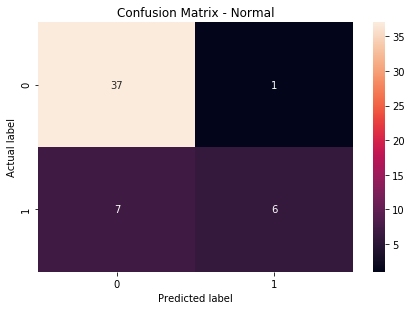

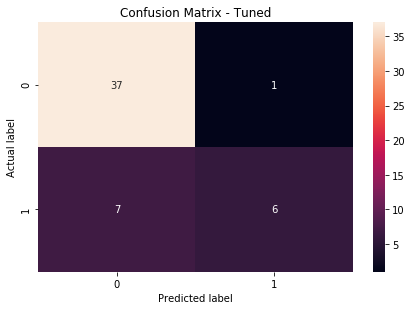

In [109]:
# confusion matrix for normal data
cnf_matrix = confusion_matrix(y_test, clf_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,  fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - Normal')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# confusion matrix for tuned data
cnf_matrix = confusion_matrix(y_test, clf_tuned_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,  fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - Tuned')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

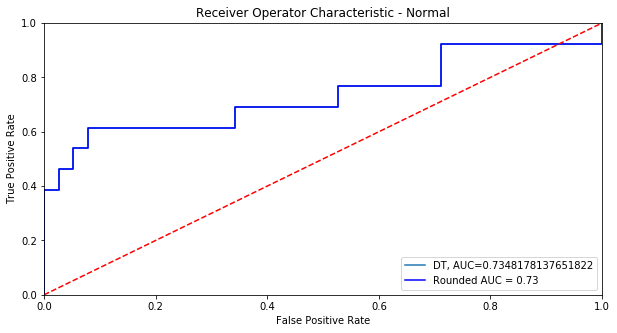

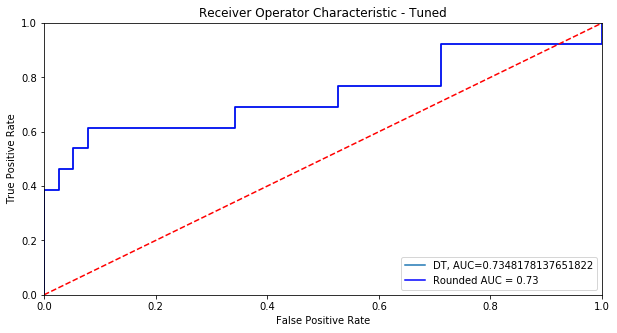

In [110]:
# ROC-AUC Score
from sklearn import metrics
for i in range(2):
    if i == 0:
        pred_proba = clf.predict_proba(x_test)[::,1]
    elif i == 1:
        pred_proba = clf_tuned.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, pred_proba)
    auc = metrics.roc_auc_score(y_test, pred_proba)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize= (10,5))
    if i == 0:
        plt.title('Receiver Operator Characteristic - Normal')
    elif i == 1:
        plt.title('Receiver Operator Characteristic - Tuned')
    plt.plot(fpr,tpr,label="DT, AUC="+str(auc))
    plt.plot(fpr, tpr, 'b', label= 'Rounded AUC = {}'.format(round(roc_auc,2)))
    plt.legend(loc = 'lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

DT: 0.615759 (0.031288)
RF: 0.722260 (0.069511)
NB: 0.476328 (0.117874)
XGB: 0.710936 (0.078809)
CB: 0.734826 (0.031095)
NN: 0.671154 (0.092697)


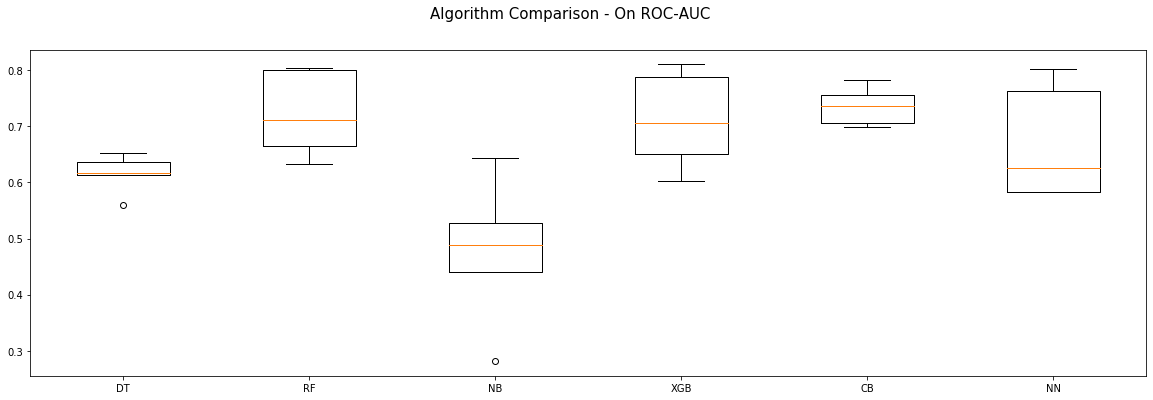

In [115]:
# importing libraries & algorithms to be compared
from sklearn.model_selection import train_test_split, KFold, cross_val_score 
from sklearn.metrics import accuracy_score, classification_report, fbeta_score 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# to feed the random state
seed = 7

# prepare models
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', BernoulliNB()))
models.append(('XGB', XGBClassifier()))
models.append(('CB', clf_tuned))
models.append(('NN', MLPClassifier()))

# scoring
results = []
names = []

# evaluate each model in turn for normal & oversampled data        
for name, model in models:
    cv_results = cross_val_score(model, data.apply(LabelEncoder().fit_transform), target, cv=5, n_jobs=-3, scoring= 'roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
            
# boxplot algorithm comparison for normal & oversampled data
fig = plt.figure(figsize=(20,6))
fig.suptitle('Algorithm Comparison - On ROC-AUC', fontsize=15)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- In terms of ROC AUC, it seems that the tuned CatBoostClassifier is the best for differentiating & predicting between fraud classes. To dive deeper into the issue, we would like to do some more analysis on the catboost model features & its explainability

# 9. Model Feature Importance

- We would like to try the model explanation pacakges that is built in on the catboost model, and some of them are:

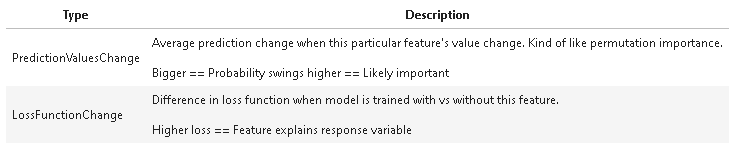

In [179]:
# showing the existing features
display(len(clf_tuned.feature_names_))
clf_tuned.feature_names_

33

['BillingAddressLen',
 'Country',
 'IPAddressLen',
 'No_Orders',
 'No_Payments',
 'customerPhoneLen',
 'emailNameLen',
 'emailType',
 'emailTypeDomain',
 'is_american_express',
 'is_applepay',
 'is_bitcoin',
 'is_card',
 'is_jcb16',
 'is_maestro',
 'is_paypal',
 'is_visa13',
 'is_visa16',
 'is_voyager',
 'paymentMethodProvider_nunique',
 'paymentMethodRegistrationFailure_sum',
 'paymentMethodType_nunique',
 'transactionAmount_75%',
 'transactionAmount_90%',
 'transactionAmount_max',
 'transactionAmount_mean',
 'transactionAmount_median',
 'transactionAmount_min',
 'transactionAmount_range',
 'transactionAmount_std',
 'transactionAmount_sum',
 'transactionFailed_mean',
 'transactionFailed_sum']

In [159]:
# setting train pool for description
pool_train = cb.Pool(
    data=x_train,
    label=y_train,
    cat_features=categorical_columns,
)

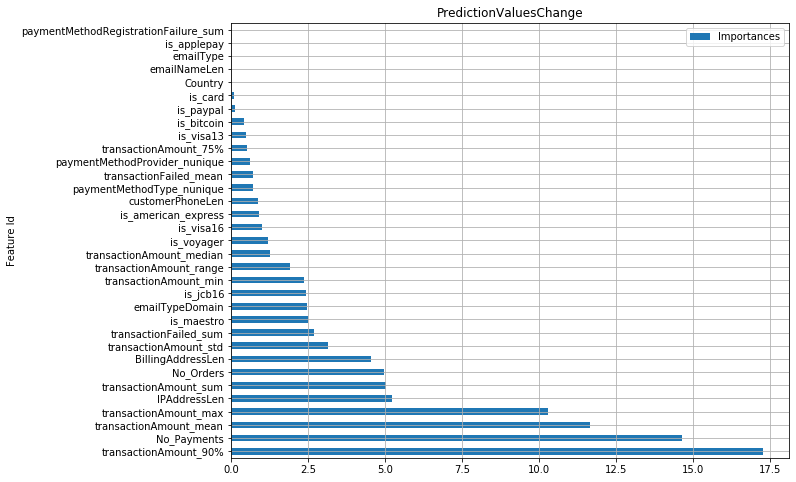

In [160]:
# PredictionValuesChange
type_feature_importance = "PredictionValuesChange"

clf_tuned.get_feature_importance(
    type=type_feature_importance,
    prettified=True
).set_index("Feature Id")\
.plot.barh(figsize=(10, 8), grid=True, title=type_feature_importance)

- Think permutation importance. Here a feature is deemed important if changing the value of the feature changes the output probability significantly. Note that big swings in probability output does not 100% equate to model performance. It seems that the transactionAmount_90%, No_Payments & transactionAmount_mean is the top three features that is quite important for the changing prediction of this model.

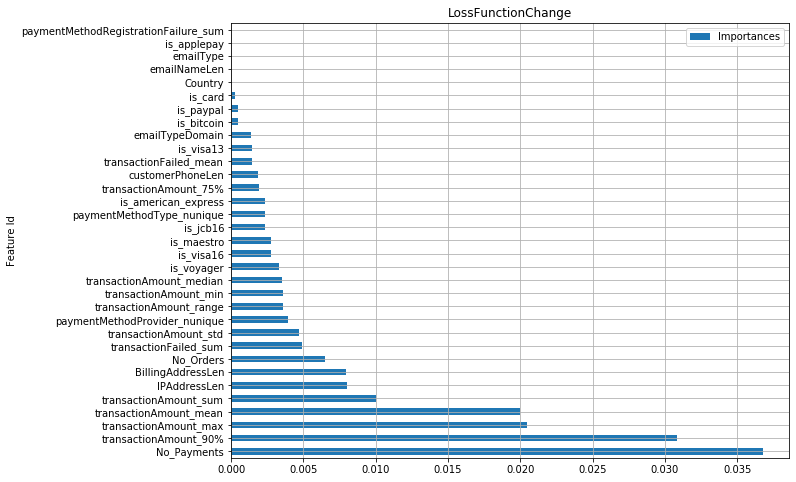

In [162]:
# LossFunctionChange
type_feature_importance = "LossFunctionChange"

clf_tuned.get_feature_importance(
    data=pool_train,
    type=type_feature_importance,
    prettified=True
).set_index("Feature Id")\
.plot.barh(figsize=(10, 8), grid=True, title=type_feature_importance)

- Think feature dropout. A feature is deemed important here if removing the feature causes significant difference in model performance. CatBoost checks model performance with feature compared to model performance without feature. It seems that the No_Payments, transactionAmount_90%,  & transactionAmount_max is the top three features that will cause significant differences if they are omitted from the model, hence its importance.

In [194]:
# basic feature importance
d={}
for name, value in list(zip(clf_tuned.feature_names_, clf_tuned.feature_importances_)):
    d[name] = value 
pd.DataFrame(d, index=[0]).T.rename(columns={0:'Feature Importance'}).sort_values('Feature Importance', ascending=False)

,Feature Importance
transactionAmount_90%,17.247970
No_Payments,14.635035
transactionAmount_mean,11.637089
transactionAmount_max,10.287140
IPAddressLen,5.236705
transactionAmount_sum,5.035273
No_Orders,4.963772
BillingAddressLen,4.533572
transactionAmount_std,3.139946
transactionFailed_sum,2.693240


- All in all, there 4 features that's quite reliably on top most of the times and they are transactionAmount_90%, No_Payments, transactionAmount_mean & transactionAmount_max. Further discussion on this model should go towards tweaking these important features as well pruning the unimportant ones.